<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 1</center></h2>

#### Brief
Please refer to the document attached with this assignment for submission instructions and other requirements. Please do not change the order of the notebook. Implement your solutions in the spaces provided.

#### Overview
In the first part of this assignment, you will pre-process the given data.<br>
In the second part, you will implement Linear Regression as discussed in class.<br>
For Part 1, we will use 'googleplaystore.csv' dataset which contain information of application on the Google Play Store.<br>
For Part 2, we will use scaled down version of Boston house price dataset.
All datasets have been provided along with this .ipynb file on the classroom.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

## Part 1
### Data Pre-Processing and Visualization

In [2]:
# There is a series of tutorials on pandas library https://www.tutorialspoint.com/python_pandas/python_pandas_introduction.htm

# Load Dataset
data = pd.read_csv('googleplaystore.csv')

In [3]:
'''
Print the names of all columns in the dataset.
'''
# YOUR CODE HERE
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
'''
Some "Rating" values are missing (NaN), fill them by taking the average of the "Rating" values in the rows above and below.
Incase the "Rating" value in the row below is also missing, use only the row above.
'''
# YOUR CODE HERE
nanIndexes = np.where(np.isnan(data.Rating))[0] #a list of indexes of NaN values
print("Checking number of nulls in Rating", len(nanIndexes))

for i in range(data.shape[0]): # iterating over number of rows in dataframe
    if(np.isnan(data.Rating.iloc[i])): # checking if current index is NaN or not
        #print (i)
        if(np.isnan(data.Rating.iloc[i+1])): # checking if next index of current NaN index is also NaN or not.
            data.Rating.iloc[i]= data.Rating.iloc[i-1] # assigning upper row's rating only
        else:
            data.Rating.iloc[i] = (( data.Rating.iloc[i-1]+ data.Rating.iloc[i+1])/2) #assiging avaerage or upper and lower rows

nanIndexes = np.where(np.isnan(data.Rating))[0]
print("Checking number of nulls in Rating, after filling", len(nanIndexes))

Checking number of nulls in Rating 1474


D:\Installed\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Checking number of nulls in Rating, after filling 0


In [5]:
'''
Write a method to calculate the total profit (i.e. No. of installations x price) of all apps which have a
Rating of 4.3 or below.
You need to process the strings in the "Installs" and "Price" columns to retrieve their values as integers.
You need to sum up the individual profits for all apps that meet the above condition.
'''
# YOUR CODE HERE
print(data.Installs.groupby(data.Installs).count()) # analyzing the Install data

Installs
0                    1
0+                  14
1+                  67
1,000+             907
1,000,000+        1579
1,000,000,000+      58
10+                386
10,000+           1054
10,000,000+       1252
100+               719
100,000+          1169
100,000,000+       409
5+                  82
5,000+             477
5,000,000+         752
50+                205
50,000+            479
50,000,000+        289
500+               330
500,000+           539
500,000,000+        72
Free                 1
Name: Installs, dtype: int64


In [6]:
data['Num_Installs'] = data['Installs'] #Making another column in data, in which current installs are mapped without + and ,
#Another way can be to replace using splitting strings, but that is different for every unique values, so I am just replacing 
#directly
data['Num_Installs'].replace('Free',0,inplace=True)
data['Num_Installs'].replace('0',0,inplace=True)
data['Num_Installs'].replace('0+',0,inplace=True)
data['Num_Installs'].replace('1+',1,inplace=True)
data['Num_Installs'].replace('1,000+',1000,inplace=True)
data['Num_Installs'].replace('1,000,000+',1000000,inplace=True)
data['Num_Installs'].replace('1,000,000,000+',1000000000,inplace=True)
data['Num_Installs'].replace('10+',10,inplace=True)
data['Num_Installs'].replace('10,000+',10000,inplace=True)
data['Num_Installs'].replace('10,000,000+',10000000,inplace=True)
data['Num_Installs'].replace('100+',100,inplace=True)
data['Num_Installs'].replace('100,000+',100000,inplace=True)
data['Num_Installs'].replace('100,000,000+',100000000,inplace=True)
data['Num_Installs'].replace('5+',5,inplace=True)
data['Num_Installs'].replace('5,000+',5000,inplace=True)
data['Num_Installs'].replace('5,000,000+',5000000,inplace=True)
data['Num_Installs'].replace('50+',50,inplace=True)
data['Num_Installs'].replace('50,000+',50000,inplace=True)
data['Num_Installs'].replace('50,000,000+',50000000,inplace=True)
data['Num_Installs'].replace('500+',500,inplace=True)
data['Num_Installs'].replace('500,000+',500000,inplace=True)
data['Num_Installs'].replace('500,000,000+',500000000,inplace=True)

In [7]:
print(data.Num_Installs.groupby(data.Num_Installs).count()) #checking the new install column values after mapping

Num_Installs
0               16
1               67
5               82
10             386
50             205
100            719
500            330
1000           907
5000           477
10000         1054
50000          479
100000        1169
500000         539
1000000       1579
5000000        752
10000000      1252
50000000       289
100000000      409
500000000       72
1000000000      58
Name: Num_Installs, dtype: int64


In [8]:
print(data.Price.groupby(data.Price).count()) # checking and analyzing the Price column values

Price
$0.99         148
$1.00           3
$1.04           1
$1.20           1
$1.26           1
$1.29           1
$1.49          46
$1.50           1
$1.59           1
$1.61           1
$1.70           2
$1.75           1
$1.76           1
$1.96           1
$1.97           1
$1.99          73
$10.00          3
$10.99          2
$109.99         1
$11.99          5
$12.99          5
$13.99          2
$14.00          1
$14.99         11
$15.46          1
$15.99          1
$154.99         1
$16.99          3
$17.99          2
$18.99          1
            ...  
$39.99          2
$394.99         1
$399.99        12
$4.29           1
$4.49           9
$4.59           1
$4.60           1
$4.77           1
$4.80           1
$4.84           1
$4.85           1
$4.99          72
$400.00         1
$46.99          1
$5.00           1
$5.49           6
$5.99          30
$6.49           5
$6.99          13
$7.49           2
$7.99           7
$74.99          1
$79.99          2
$8.49           2
$8.9

In [9]:
data['New_Price'] = data['Price'] #making a new column of processed Prices, we can later on drop the old columns
#Replacing values now

data['New_Price'].replace('0',0,inplace=True)
data['New_Price'].replace('Everyone',0,inplace=True)
data['New_Price'] = data['New_Price'].str.split("$", expand=True)[1]
data["New_Price"] = data["New_Price"].astype(float) 
data.New_Price.fillna(0, inplace=True)
data.head(5) #visualizing data frame

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  Num_Installs  New_Price  
0  4.0.3 and up         10000        0.0  
1  4.0.3 and up        500000        0.0  
2  4.0.3 and up       5000000        0.0  
3    4.2 and up      50000000        0.0  
4    4.4 and up        100000        0.0

In [10]:
def CalculateProfit(): #After processing prices and number of installs, now we can simply calulate profit with given condition
    data['Profit'] = data.Num_Installs * data.New_Price # making a corresponding profit for each data point
    print(np.where(data.Rating <= 4.3 , data.Profit,0).sum()) #printing over given condition

CalculateProfit()

125048216.27


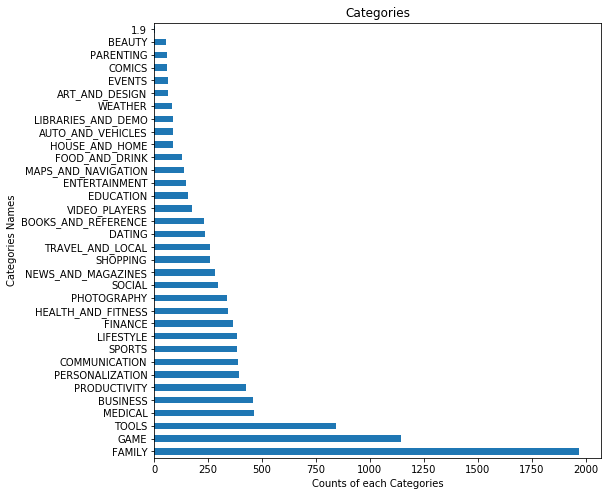

In [101]:
'''
Create a histogram of the total counts of each Category in the dataset.
'''
# YOUR CODE HERE
#data.hist(coluum = 'Category')
data.Category.value_counts().plot(kind='barh', figsize=(8,8));
plt.title("Categories")
plt.xlabel('Counts of each Categories')
plt.ylabel('Categories Names')
plt.show()

In [45]:
'''
Create a bar graph of profit generated by each android version.
'''
# YOUR CODE HERE
print(data['Android Ver'].unique())
#print(data['Android Ver'].groupby(data['Android Ver']).count()) 

['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '2.3.3 and up' 'Varies with device'
 '2.2 and up' '5.0 and up' '6.0 and up' '1.6 and up' '1.5 and up'
 '2.1 and up' '7.0 and up' '5.1 and up' '4.3 and up' '4.0.3 - 7.1.1'
 '2.0 and up' '3.2 and up' '4.4W and up' '7.1 and up' '7.0 - 7.1.1'
 '8.0 and up' '5.0 - 8.0' '3.1 and up' '2.0.1 and up' '4.1 - 7.1.1' nan
 '5.0 - 6.0' '1.0 and up' '2.2 - 7.1.1' '5.0 - 7.1.1']


In [51]:
#data['Android Ver'].fillna('Unknown', inplace=True)
Versions = data['Android Ver'].unique() #A list of unique values of Versions

Profits=[None] *  len(Versions) #creating a empty list of size of Profits, to map corresponding summed number of Profits
for i in range(len(Versions)):
    #print(i)
    Profits[i] =np.where(data['Android Ver'] == Versions[i] , data.Profit,0).sum()
    print(Versions[i],' : ',Profits[i] )

4.0.3 and up  :  49594218.080000006
4.2 and up  :  9224184.18
4.4 and up  :  20240842.24
2.3 and up  :  24886136.72
3.0 and up  :  10707064.39
4.1 and up  :  45130770.49
4.0 and up  :  40284382.69
2.3.3 and up  :  9442051.2
Varies with device  :  158765482.39
2.2 and up  :  1398355.0499999998
5.0 and up  :  9015109.15
6.0 and up  :  20175.29
1.6 and up  :  3768736.1799999997
1.5 and up  :  61823.5
2.1 and up  :  832402.1499999999
7.0 and up  :  78844.0
5.1 and up  :  74949.0
4.3 and up  :  3492657.99
4.0.3 - 7.1.1  :  0.0
2.0 and up  :  1109008.9
3.2 and up  :  61393.85
4.4W and up  :  249790.0
7.1 and up  :  0.0
7.0 - 7.1.1  :  0.0
8.0 and up  :  149.0
5.0 - 8.0  :  0.0
3.1 and up  :  4.95
2.0.1 and up  :  189424.4
4.1 - 7.1.1  :  0.0
Unknown  :  1490.0
5.0 - 6.0  :  0.0
1.0 and up  :  0.0
2.2 - 7.1.1  :  0.0
5.0 - 7.1.1  :  0.0


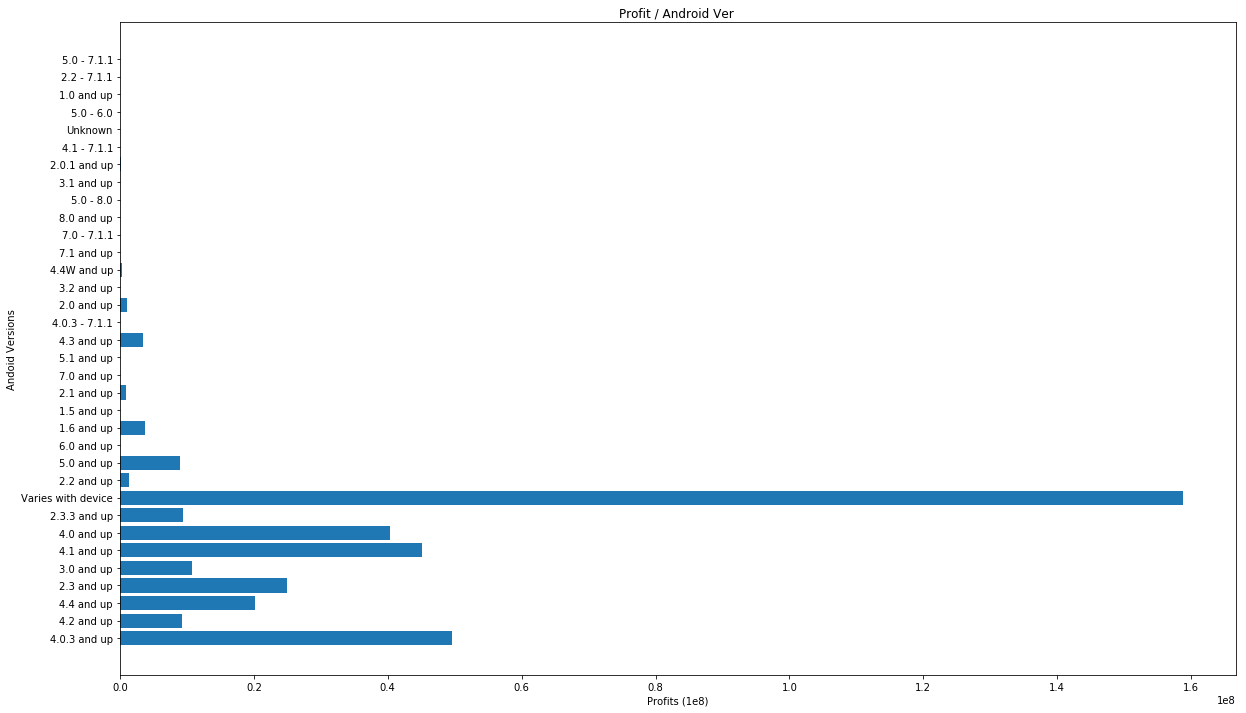

In [66]:
plt.figure(figsize=(20,12))
plt.barh(range(len(Versions)),Profits,tick_label=Versions)
plt.title("Profit / Android Ver ")
plt.ylabel('Andoid Versions')
plt.xlabel("Profits (1e8)")
plt.show()


In [12]:
'''
For family category, plot number of installations against each content rating.
'''
# YOUR CODE HERE
data['Content Rating'].fillna('Unknown', inplace=True) # Filling Nan values of data['Content Rating']
Content_Rating = data['Content Rating'].unique() #A list of unique values of Content Rating
#print(Content_Rating, len(Content_Rating))
Parallel_Num_Installs=[None] *  len(Content_Rating) #creating a empty list of size of Content Rating, to map corresponding summed number of installs
for i in range(len(Content_Rating)):
    #print(i)
    Parallel_Num_Installs[i] =np.where(np.logical_and(data.Category == 'FAMILY', data['Content Rating'] == Content_Rating[i]) , data.Num_Installs,0).sum()
    print(Content_Rating[i],' : ',Parallel_Num_Installs[i] )

Everyone  :  6252011608
Teen  :  2165417290
Everyone 10+  :  1776904075
Mature 17+  :  63930032
Adults only 18+  :  0
Unrated  :  500
Unknown  :  0


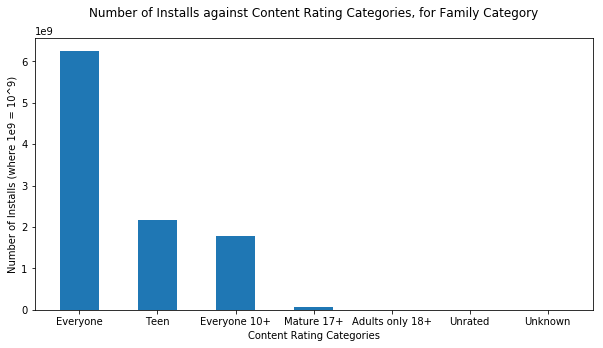

In [13]:
plt.figure(figsize=(10,5))
plt.bar(range(len(Content_Rating)),Parallel_Num_Installs,tick_label=Content_Rating, width=0.5)
plt.title('Number of Installs against Content Rating Categories, for Family Category\n')
plt.ylabel('Number of Installs (where 1e9 = 10^9)')
plt.xlabel('Content Rating Categories')

plt.show()

# Part 2
### Linear Regression

The goal of this assignment is to develop your understanding of a basic Machine Learning model and learn some basic concepts such as how datasets are visualised and misc. We think that it is necessary to not only understand the mathematics behind the models but also to know how to convert that knowledge into code that can work.



Implementation detail of each step is given below.

## For Dataset1

In [14]:
# Load Dataset
(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset.pkl", "rb" ) )

#You can load the second dataset in similar fashion
#(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset2.pkl", "rb" ) )

# to convert data from 2D i.e. N rows with 1 column to simple 1D N rows.
x_train.resize(len(x_train))
x_test.resize(len(x_test))


#### Part 2.a Linear Regression(without gradient descent) 

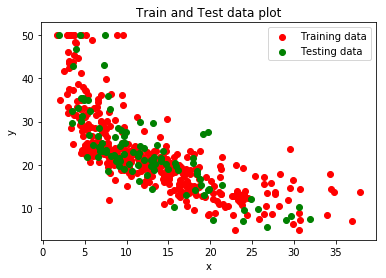

In [15]:
'''
Display training and testing dataset with different colors using matplotlib library.
'''
# YOUR CODE HERE
plt.scatter(x_train,y_train, c = 'red', label = 'Training data')
plt.scatter(x_test,y_test, c= 'green', label = 'Testing data')
plt.legend()
plt.title('Train and Test data plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<html5>
<img src="mse.png",width=250>
</html5>

<html5>
<img src="ls_mse.png",width=250>
</html5>

In [16]:
'''
Compute line parameters from training data. 
Compute 'm' and 'c' of line by formula given in the above equations.
a-hat is c and b-hat is m in equation y = mx + c
'''
# YOUR CODE HERE
x_bar = np.mean(x_train)
y_bar = np.mean(y_train)
numerator = 0
denominator = 0
for i in range(len(x_train)):
    numerator = numerator + ((x_train[i] - x_bar) * (y_train[i] - y_bar))
    denominator = denominator + ((x_train[i] - x_bar)**2)
b_hat = numerator/ denominator
m = b_hat

c = y_bar - (b_hat * x_bar)
print("c =", c, " m = ",m)

c = 34.216255712624125  m =  -0.9278216902292562


In [17]:
'''
Implement mean square error function. i.e err = mean_square_error(Y_actual, Y_predicted) 
where err is the mean square error of actual label (i.e. Y_actual) and predicted lable ( i.e. Y_predicted)
'''

def mean_square_error(Y_actual, Y_predicted):
    # YOUR CODE HERE
    se = 0
    for i in range(len(Y_actual)):
        se = se + ((Y_actual[i] - Y_predicted[i])**2)
    mse = se/len(Y_actual)
    print("mse : ", mse)
    return mse

In [18]:
'''
Compute mean square error from line using training data i.e. training error.
'''
# YOUR CODE HERE
predicted_y_train = [None] *  len(x_train)
predicted_y_train = (m * x_train) +c #filling predicted_y
mean_square_error(y_train, predicted_y_train)

mse :  39.42905636385888


39.42905636385888

In [19]:
'''
Compute mean square error from line using test data i.e. test error.
'''
# YOUR CODE 
predicted_y_test = [None] *  len(x_test)
predicted_y_test = (m * x_test) +c #filling predicted_y
mean_square_error(y_test, predicted_y_test)

mse :  34.87619673683118


34.87619673683118

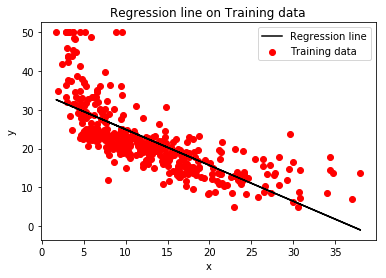

In [20]:
'''
Plot regression line on training and testing data separately.
'''
# YOUR CODE HERE
plt.scatter(x_train,y_train, c = 'red', label = 'Training data')
# plotting the regression line 
plt.plot(x_train, predicted_y_train, c= 'black', label = 'Regression line')
plt.legend()
plt.title('Regression line on Training data')
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

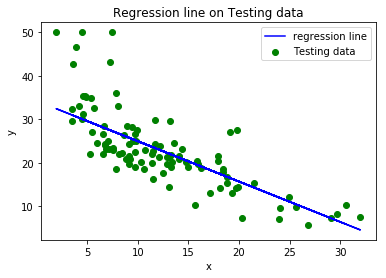

In [21]:
plt.scatter(x_test,y_test, c = 'green', label = 'Testing data')
# plotting the regression line 
plt.plot(x_test, predicted_y_test, c= 'blue', label = 'regression line') 
plt.legend()
plt.title('Regression line on Testing data')
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

# Part 2.a for DataSet 2

In [22]:
(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset2.pkl", "rb" ) )

# to convert data from 2D i.e. N rows with 1 column to simple 1D N rows.
x_train.resize(len(x_train))
x_test.resize(len(x_test))


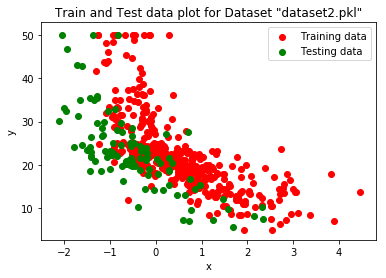

In [23]:
'''
Display training and testing dataset with different colors using matplotlib library.
'''
# YOUR CODE HERE
plt.scatter(x_train,y_train, c = 'red', label = 'Training data')
plt.scatter(x_test,y_test, c= 'green', label = 'Testing data')
plt.legend()
plt.title('Train and Test data plot for Dataset "dataset2.pkl"')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
'''
Compute line parameters from training data. 
Compute 'm' and 'c' of line by formula given in the above equations.
a-hat is c and b-hat is m in equation y = mx + c
'''
# YOUR CODE HERE
x_bar = np.mean(x_train)
y_bar = np.mean(y_train)
numerator = 0
denominator = 0
for i in range(len(x_train)):
    numerator = numerator + ((x_train[i] - x_bar) * (y_train[i] - y_bar))
    denominator = denominator + ((x_train[i] - x_bar)**2)
b_hat = numerator/ denominator
m = b_hat

c = y_bar - (b_hat * x_bar)
print("c =", c, " m = ",m)

c = 25.5263621729055  m =  -6.238131127132846


In [25]:
'''
Compute mean square error from line using training data i.e. training error.
'''
# YOUR CODE HERE
predicted_y_train = [None] *  len(x_train)
predicted_y_train = (m * x_train) +c #filling predicted_y

mean_square_error(y_train, predicted_y_train)

mse :  42.840198079698794


42.840198079698794

In [26]:
'''
Compute mean square error from line using test data i.e. test error.
'''
# YOUR CODE 
predicted_y_test = [None] *  len(x_test)
predicted_y_test = (m * x_test) +c #filling predicted_y
    
mean_square_error(y_test, predicted_y_test)

mse :  70.80834523792943


70.80834523792943

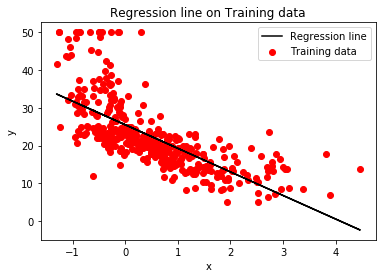

In [27]:
'''
Plot regression line on training and testing data separately.
'''
# YOUR CODE HERE
plt.scatter(x_train,y_train, c = 'red', label = 'Training data')
# plotting the regression line 
plt.plot(x_train, predicted_y_train, c= 'black', label = 'Regression line')
plt.legend()
plt.title('Regression line on Training data')
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

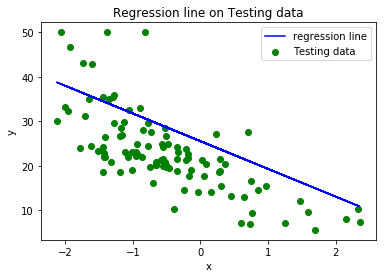

In [28]:
plt.scatter(x_test,y_test, c = 'green', label = 'Testing data')
# plotting the regression line 
plt.plot(x_test, predicted_y_test, c= 'blue', label = 'regression line') 
plt.legend()
plt.title('Regression line on Testing data')
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

#### Part 2.b Linear Regression (with gradient descent)

### Part 2.b For Dataset 1

In [81]:
# Load Dataset
(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset.pkl", "rb" ) )
x_train.resize(len(x_train))
x_test.resize(len(x_test))

In [88]:
'''
Initialize parameters i.e. learning rates, initial values of line parameters and number of epochs.
'''
# YOUR CODE HERE
from random import randint
c = 0 #randint(0, 10)
m = 0
alpha = 0.01 #10**-2 
n_epochs = 7000

In [89]:
'''
Predict output and update parameters using stochastic gradient descent.
Compute mean square error in each iteration using mean_square_error function and plot on the graph using matplotlib library
'''
# YOUR CODE HERE
n = float(len(x_train)) 
mse_list =[]
for i in range(n_epochs): 
    for j in range(len(x_train)):
        pred_y = m * x_train[j] + c
        m_der = (-2/n) * (x_train[j] * (y_train[j] - pred_y))  #derivative taken by hand and last equation written here.
        m = m - alpha * m_der 
        c_der = (-2/n) * (y_train[j] - pred_y)
        c = c - alpha * c_der
    print (m, c)
    
    predicted_y_train = [None] *  len(x_train)
    predicted_y_train = (m * x_train) +c #filling predicted_y
        
    mse_list.append(mean_square_error(y_train, predicted_y_train))
    #print(mse_list)

1.0843494757434917 0.22838110731693353
mse :  321.72734254945686
1.0886048883075143 0.3944712934717059
mse :  318.99621905697575
1.0791708660245594 0.5589751973874093
mse :  316.2850041651956
1.0696089239157287 0.7226686799040692
mse :  313.5994873770457
1.0600913025528733 0.88556545343527
mse :  310.9400405572881
1.0506199687685318 1.0476695192439982
mse :  308.3064187055579
1.0411947250685747 1.2089847364712698
mse :  305.69837117141174
1.0318153475173573 1.369514943918551
mse :  303.1156496341301
1.0224816129204914 1.529263961686675
mse :  300.558008182689
1.01319329916529 1.6882355912864322
mse :  298.02520329369105
1.0039501852198813 1.8464336157292736
mse :  295.51699380820185
0.9947520511279966 2.0038617996173547
mse :  293.0331409087926
0.9855986780037482 2.1605238892330982
mse :  290.5734080968057
0.9764898480264107 2.316423612628381
mse :  288.13756116984155
0.9674253444352441 2.4715646797132043
mse :  285.72536819946527
0.9584049515243341 2.6259507823440003
mse :  283.336599

-0.11210794694302709 20.94802564567697
mse :  82.62850111702855
-0.11587499670477086 21.012499570136352
mse :  82.21211704651117
-0.11962371483633673 21.07665974452229
mse :  81.7997774715891
-0.12335419054511612 21.140507695639897
mse :  81.39144311550885
-0.1270665126043857 21.204044942864208
mse :  80.98707508289777
-0.13076076935541897 21.267272998176495
mse :  80.58663485605928
-0.1344370487096008 21.33019336620034
mse :  80.1900842913058
-0.13809543815050862 21.39280754423735
mse :  79.7973856153274
-0.14173602473599883 21.455117022302755
mse :  79.4085014215965
-0.1453588951002746 21.51712328316095
mse :  79.02339466680519
-0.14896413545595386 21.578827802360706
mse :  78.64202866733979
-0.1525518315961148 21.640232048270324
mse :  78.26436709578775
-0.15612206889633948 21.701337482112585
mse :  77.8903739774789
-0.15967493231674743 21.762145557999478
mse :  77.52001368706125
-0.16321050640401605 21.822657722966873
mse :  77.1532509451085
-0.16672887529338973 21.882875417008893


-0.5707267431709229 28.79739199170549
mse :  46.87893084365226
-0.572262011911659 28.82366846987158
mse :  46.809862174555086
-0.573789809559483 28.849817078561426
mse :  46.74146484222125
-0.5753101724710452 28.875838440027454
mse :  46.673732325017845
-0.5768231368260724 28.90173317349406
mse :  46.60665816464775
-0.5783287386282339 28.92750189517231
mse :  46.54023596553492
-0.579827013705991 28.953145218274564
mse :  46.47445939421512
-0.5813179977134516 28.978663753029103
mse :  46.40932217873298
-0.5828017261312184 29.00405810669461
mse :  46.34481810804482
-0.5842782342672395 29.02932888357477
mse :  46.28094103142657
-0.5857475572576408 29.054476685032476
mse :  46.21768485788877
-0.587209730067564 29.07950210950412
mse :  46.15504355559644
-0.5886647874919981 29.104405752514023
mse :  46.093011151294135
-0.5901127641566166 29.12918820668855
mse :  46.031581729737375
-0.5915536945185856 29.15385006177003
mse :  45.970749433129804
-0.5929876128673939 29.178391904630946
mse :  45

-0.7245047121664948 31.429337355747325
mse :  41.63782402067819
-0.7252916497104346 31.44280597309276
mse :  41.619716389555215
-0.7260747577727037 31.45620904797728
mse :  41.60178495043887
-0.726854054988742 31.469546899350647
mse :  41.584027990812814
-0.7276295599033057 31.482819844610674
mse :  41.56644381479662
-0.7284012909709093 31.496028199610645
mse :  41.549030742984115
-0.7291692665562614 31.509172278666746
mse :  41.531787112283354
-0.7299335049347002 31.522252394565633
mse :  41.51471127575827
-0.7306940242926292 31.53526885857174
mse :  41.49780160247193
-0.7314508427279564 31.548221980434977
mse :  41.48105647733078
-0.7322039782505148 31.56111206839778
mse :  41.46447430093119
-0.732953448782501 31.57393942920264
mse :  41.44805348940664
-0.733699272158888 31.586704368099284
mse :  41.43179247427728
-0.73444146612787 31.599407188852066
mse :  41.41568970230018
-0.7351800483512624 31.612048193747125
mse :  41.39974363532153
-0.7359150364049393 31.624627683599517
mse :  

-0.8212677614384972 33.08545923461886
mse :  40.07653933985868
-0.82158382003313 33.090868650274075
mse :  40.07363760505112
-0.8218983405888101 33.09625174203828
mse :  40.07076419809174
-0.8222113305901163 33.101608638011854
mse :  40.06791884319261
-0.8225227974851949 33.106939465671395
mse :  40.06510126724693
-0.8228327486859492 33.11224435187346
mse :  40.06231119980334
-0.8231411915682225 33.11752342285722
mse :  40.059548373039554
-0.8234481334719534 33.12277680424754
mse :  40.05681252173757
-0.8237535817013762 33.12800462105791
mse :  40.0541033832577
-0.8240575435251649 33.133206997693485
mse :  40.05142069751391
-0.8243600261766318 33.13838405795401
mse :  40.048764206948874
-0.8246610368538911 33.143535925036886
mse :  40.046133656509426
-0.8249605827200173 33.14866272153977
mse :  40.04352879362219
-0.8252586709032419 33.15376456946403
mse :  40.04094936816963
-0.8255553084970984 33.15884159021704
mse :  40.038395132465915
-0.8258505025606004 33.16389390461554
mse :  40.0

-0.859356035570928 33.7373488205068
mse :  39.82990857866689
-0.8594867448339807 33.739585939654454
mse :  39.82942005592511
-0.8596168180253034 33.74181217228792
mse :  39.82893634035723
-0.8597462582402113 33.744027571384265
mse :  39.828457384978535
-0.8598750685589722 33.74623218966292
mse :  39.8279831432621
-0.8600032520468504 33.74842607958663
mse :  39.827513569134204
-0.8601308117541978 33.75060929336283
mse :  39.827048616969854
-0.8602577507165212 33.75278188294501
mse :  39.826588241588766
-0.860384071954567 33.75494390003382
mse :  39.826132398250465
-0.8605097784743656 33.75709539607827
mse :  39.825681042650714
-0.86063487326733 33.759236422277
mse :  39.825234130916556
-0.8607593593103097 33.76136702957954
mse :  39.82479161960262
-0.8608832395656677 33.76348726868733
mse :  39.82435346568687
-0.8610065169813597 33.7655971900554
mse :  39.82391962656632
-0.8611291944909918 33.767696843893084
mse :  39.82349006005309
-0.8612512750138848 33.76978628016516
mse :  39.823064

mse :  39.788502931239385
-0.8752692113102977 34.00970648908559
mse :  39.78842419542463
-0.8753224821345227 34.01061823151382
mse :  39.78834625031793
-0.8753754937264291 34.01152553712118
mse :  39.7882690881145
-0.8754282473475183 34.01242842749856
mse :  39.788192701086075
-0.8754807442531554 34.01332692413186
mse :  39.7881170815799
-0.8755329856925966 34.01422104840235
mse :  39.7880422220181
-0.8755849729090204 34.01511082158735
mse :  39.78796811489725
-0.8756367071395614 34.01599626486071
mse :  39.787894752787054
-0.875688189615326 34.01687739929305
mse :  39.78782212833016
-0.8757394215614267 34.017754245852494
mse :  39.787750234241166
-0.8757904041970189 34.018626825405114
mse :  39.78767906330603
-0.8758411387353249 34.0194951587156
mse :  39.787608608381554
-0.8758916263836629 34.02035926644732
mse :  39.78753886239404
-0.8759418683434792 34.02121916916347
mse :  39.78746981833952
-0.8759918658103658 34.02207488732676
mse :  39.78740146928227
-0.8760416199741027 34.02292

-0.881904431898931 34.12326981796627
mse :  39.78184406963948
-0.8819254136859366 34.1236289260843
mse :  39.78183326635718
-0.8819462933690752 34.12398628667111
mse :  39.78182257825869
-0.8819670714452104 34.124341908230654
mse :  39.781812004175585
-0.8819877484087938 34.124695799225584
mse :  39.78180154295107
-0.8820083247518712 34.125047968077354
mse :  39.781791193439716
-0.8820288009640925 34.12539842316647
mse :  39.781780954507624
-0.8820491775327267 34.125747172832654
mse :  39.78177082503204
-0.8820694549426741 34.12609422537508
mse :  39.78176080390135
-0.8820896336764689 34.12643958905242
mse :  39.781750890015
-0.8821097142142994 34.12678327208314
mse :  39.781741082283204
-0.8821296970340123 34.12712528264584
mse :  39.781731379627374
-0.8821495826111444 34.12746562887937
mse :  39.78172178097925
-0.8821693714188991 34.12780431888265
mse :  39.7817122852812
-0.8821890639281907 34.12814136071558
mse :  39.78170289148643
-0.882208660607632 34.128476762398584
mse :  39.781

-0.8844502628010728 34.16684230032048
mse :  39.7809936999423
-0.8844588557868818 34.16698937125212
mse :  39.78099240204293
-0.8844674069565613 34.16713572649104
mse :  39.780991120961154
-0.8844759165136051 34.16728136952013
mse :  39.78098985651326
-0.8844843846605089 34.167426303805144
mse :  39.780988608517326
-0.8844928115987867 34.167570532795004
mse :  39.78098737679322
-0.8845011975289766 34.167714059922005
mse :  39.78098616116283
-0.8845095426506351 34.16785688860163
mse :  39.780984961449825
-0.8845178471623488 34.1679990222326
mse :  39.78098377747946
-0.8845261112617374 34.16814046419741
mse :  39.78098260907915
-0.8845343351454594 34.168281217861775
mse :  39.78098145607777
-0.8845425190092193 34.16842128657528
mse :  39.78098031830615
-0.8845506630477635 34.16856067367105
mse :  39.78097919559678
-0.884558767454897 34.16869938246609
mse :  39.78097808778387
-0.8845668324234773 34.16883741626122
mse :  39.780976994703344
-0.8845748581454225 34.168974778341116
mse :  39.7

mse :  39.780913457791996
-0.8854928950999507 34.18468719229919
mse :  39.7809134488254
-0.8854964143142627 34.184747424462856
mse :  39.7809134416812
-0.8854999164029905 34.18480736351816
mse :  39.780913436333115
-0.8855034014494682 34.18486701089145
mse :  39.78091343275536
-0.8855068695366378 34.1849263680023
mse :  39.780913430922425
-0.8855103207470159 34.18498543626296
mse :  39.780913430809015
-0.8855137551627364 34.18504421707918
mse :  39.780913432390115
-0.8855171728655263 34.18510271184972
mse :  39.78091343564108
-0.8855205739367166 34.18516092196661
mse :  39.78091344053749
-0.8855239584572466 34.18521884881516
mse :  39.78091344705526
-0.8855273265076485 34.18527649377365
mse :  39.78091345517042
-0.8855306781680743 34.18533385821394
mse :  39.78091346485949
-0.8855340135182811 34.185390943501055
mse :  39.78091347609905
-0.8855373326376431 34.18544775099355
mse :  39.780913488866126
-0.8855406356051433 34.18550428204317
mse :  39.78091350313779
-0.8855439224993813 34.18

-0.8858343822149483 34.190531822938226
mse :  39.78092102294109
-0.8858362396472557 34.19056361332002
mse :  39.78092110982205
-0.88583808804072 34.190595248999955
mse :  39.78092119677104
-0.88583992743933 34.19062673073091
mse :  39.780921283782824
-0.8858417578868606 34.19065805926209
mse :  39.780921370852354
-0.8858435794268701 34.19068923533897
mse :  39.780921457974664
-0.8858453921027031 34.19072025970342
mse :  39.780921545144935
-0.8858471959574943 34.1907511330937
mse :  39.78092163235828
-0.8858489910341621 34.190781856244385
mse :  39.78092171961007
-0.8858507773754374 34.19081242988681
mse :  39.780921806895506
-0.8858525550238241 34.19084285474849
mse :  39.780921894210046
-0.8858543240216225 34.19087313155331
mse :  39.780921981549106
-0.8858560844109284 34.1909032610218
mse :  39.78092206890825
-0.8858578362336305 34.19093324387087
mse :  39.780922156282934
-0.8858595795314257 34.19096308081427
mse :  39.78092224366897
-0.8858613143457954 34.19099277256183
mse :  39.78

-0.8860728949710794 34.1946140237038
mse :  39.780936222716086
-0.886073591726488 34.19462594883314
mse :  39.78093627905766
-0.8860742850912704 34.194637815931095
mse :  39.78093633519406
-0.8860749750819239 34.194649625280114
mse :  39.78093639112574
-0.8860756617148703 34.19466137716114
mse :  39.780936446852834
-0.8860763450064475 34.19467307185389
mse :  39.78093650237589
-0.886077024972917 34.19468470963668
mse :  39.78093655769514
-0.8860777016304574 34.1946962907863
mse :  39.78093661281086
-0.8860783749951723 34.194707815578546
mse :  39.78093666772362
-0.8860790450830885 34.194719284287586
mse :  39.78093672243358
-0.8860797119101482 34.19473069718633
mse :  39.780936776941154
-0.8860803754922204 34.194742054546374
mse :  39.78093683124673
-0.8860810358450979 34.19475335663796
mse :  39.780936885350634
-0.8860816929844919 34.19476460373009
mse :  39.78093693925336
-0.88608234692605 34.19477579609052
mse :  39.780936992955105
-0.8860829976853243 34.19478693398539
mse :  39.780

-0.8861545045693416 34.19601079077789
mse :  39.78094329490887
-0.8861548041871883 34.196015918806346
mse :  39.78094332263137
-0.886155102346997 34.196021021880156
mse :  39.78094335023178
-0.8861553990558715 34.19602610012089
mse :  39.780943377710514
-0.8861556943208664 34.19603115364928
mse :  39.78094340506799
-0.8861559881490088 34.19603618258562
mse :  39.78094343230478
-0.8861562805472892 34.196041187049524
mse :  39.78094345942128
-0.8861565715226739 34.19604616716029
mse :  39.780943486418046
-0.8861568610820828 34.19605112303629
mse :  39.780943513295455
-0.8861571492324055 34.1960560547954
mse :  39.78094354005394
-0.8861574359804985 34.196060962555116
mse :  39.7809435666941
-0.8861577213331882 34.19606584643213
mse :  39.7809435932163
-0.8861580052972635 34.19607070654267
mse :  39.780943619620935
-0.8861582878794841 34.1960755430025
mse :  39.78094364590865
-0.8861585690865699 34.196080355926526
mse :  39.780943672079744
-0.8861588489252131 34.19608514542939
mse :  39.78

-0.8861919418913771 34.19665153916867
mse :  39.78094685844031
-0.8861920593276217 34.196653549117
mse :  39.780946869934546
-0.8861921761923911 34.19665554928451
mse :  39.78094688137488
-0.8861922924884588 34.196657539718494
mse :  39.7809468927615
-0.8861924082185955 34.19665952046644
mse :  39.78094690409452
-0.8861925233855514 34.19666149157537
mse :  39.78094691537436
-0.8861926379920659 34.19666345309232
mse :  39.78094692660123
-0.8861927520408716 34.19666540506387
mse :  39.780946937775305
-0.8861928655346804 34.19666734753656
mse :  39.78094694889685
-0.8861929784761917 34.19666928055657
mse :  39.78094695996614
-0.8861930908680967 34.196671204169874
mse :  39.78094697098328
-0.8861932027130682 34.196673118422346
mse :  39.780946981948716
-0.8861933140137651 34.196675023359404
mse :  39.78094699286251
-0.8861934247728377 34.19667691902644
mse :  39.780947003724975
-0.8861935349929253 34.196678805468636
mse :  39.78094701453635
-0.886193644676647 34.19668068273081
mse :  39.78

-0.8862054407418654 34.196882575104375
mse :  39.780948192603795
-0.8862054924885281 34.196883460760446
mse :  39.780948197768446
-0.8862055439833733 34.19688434210657
mse :  39.780948202908284
-0.8862055952276299 34.19688521916385
mse :  39.78094820802358
-0.8862056462225145 34.196886091953054
mse :  39.78094821311432
-0.8862056969692451 34.196886960495036
mse :  39.78094821818064
-0.886205747469026 34.196887824810396
mse :  39.780948223222644
-0.886205797723057 34.196888684919706
mse :  39.780948228240455
-0.8862058477325392 34.19688954084354
mse :  39.7809482332343
-0.886205897498659 34.19689039260215
mse :  39.78094823820416
-0.8862059470226002 34.19689124021579
mse :  39.78094824315014
-0.8862059963055451 34.19689208370477
mse :  39.78094824807245
-0.8862060453486637 34.196892923089045
mse :  39.78094825297119
-0.8862060941531206 34.19689375838855
mse :  39.78094825784633
-0.8862061427200826 34.196894589623284
mse :  39.780948262698175
-0.8862061910506989 34.19689541681291
mse :  

-0.8862117617193702 34.19699076009051
mse :  39.780948826314116
-0.8862117827061985 34.1969911192849
mse :  39.780948828427675
-0.8862118035908972 34.19699147673132
mse :  39.780948830530996
-0.8862118243739654 34.19699183243834
mse :  39.7809488326242
-0.8862118450558977 34.19699218641438
mse :  39.78094883470723
-0.8862118656371841 34.19699253866782
mse :  39.78094883678022
-0.8862118861183191 34.19699288920718
mse :  39.7809488388432
-0.8862119064997848 34.19699323804064
mse :  39.780948840896116
-0.886211926782065 34.19699358517652
mse :  39.78094884293914
-0.8862119469656443 34.19699393062317
mse :  39.78094884497234
-0.8862119670510091 34.19699427438881
mse :  39.78094884699566
-0.8862119870386299 34.19699461648153
mse :  39.780948849009164
-0.8862120069289847 34.19699495690954
mse :  39.78094885101294
-0.8862120267225501 34.19699529568097
mse :  39.78094885300705
-0.8862120464197929 34.196995632803834
mse :  39.780948854991536
-0.8862120660211812 34.19699596828611
mse :  39.7809

mse :  39.78094906779164
-0.8862141647828767 34.19703188907598
mse :  39.780949068735254
-0.8862141740756564 34.19703204812408
mse :  39.78094906967436
-0.8862141833232137 34.19703220639811
mse :  39.780949070608855
-0.8862141925257664 34.19703236390193
mse :  39.78094907153882
-0.886214201683537 34.19703252063928
mse :  39.78094907246427
-0.8862142107967416 34.197032676613894
mse :  39.78094907338525
-0.8862142198656003 34.19703283182948
mse :  39.78094907430168
-0.8862142288903296 34.197032986289834
mse :  39.780949075213776
-0.8862142378711415 34.19703313999847
mse :  39.78094907612135
-0.8862142468082459 34.19703329295908
mse :  39.78094907702459
-0.886214255701864 34.197033445175414
mse :  39.78094907792344
-0.8862142645522039 34.19703359665101
mse :  39.780949078817876
-0.8862142733594721 34.19703374738942
mse :  39.780949079707995
-0.8862142821238836 34.197033897394356
mse :  39.780949080593814
-0.88621429084564 34.197034046669245
mse :  39.780949081475356
-0.8862142995249582 34

mse :  39.780949159914805
-0.8862150714126623 34.19704740625363
mse :  39.78094916041109
-0.8862150762934997 34.197047489790286
mse :  39.780949160904946
-0.8862150811505844 34.197047572920425
mse :  39.780949161396364
-0.8862150859840333 34.197047655645996
mse :  39.780949161885445
-0.8862150907939617 34.19704773796902
mse :  39.78094916237216
-0.8862150955804803 34.19704781989138
mse :  39.78094916285646
-0.8862151003437104 34.19704790141519
mse :  39.78094916333845
-0.8862151050837617 34.19704798254225
mse :  39.78094916381808
-0.8862151098007436 34.19704806327445
mse :  39.78094916429532
-0.8862151144947706 34.197048143613834
mse :  39.78094916477035
-0.8862151191659595 34.19704822356233
mse :  39.78094916524304
-0.8862151238144125 34.19704830312163
mse :  39.78094916571336
-0.8862151284402449 34.19704838229383
mse :  39.780949166181465
-0.8862151330435665 34.197048461080755
mse :  39.78094916664727
-0.886215137624491 34.197048539484356
mse :  39.78094916711087
-0.8862151421831211 

-0.8862156451943145 34.19705722665878
mse :  39.78094921849107
-0.8862156472829523 34.1970572624063
mse :  39.7809492187026
-0.8862156493614297 34.19705729797993
mse :  39.780949218913086
-0.8862156514297902 34.19705733338038
mse :  39.78094921912247
-0.8862156534880858 34.19705736860857
mse :  39.78094921933094
-0.8862156555363655 34.19705740366538
mse :  39.78094921953838
-0.8862156575746808 34.197057438551646
mse :  39.78094921974484
-0.886215659603077 34.19705747326808
mse :  39.78094921995019
-0.8862156616216001 34.19705750781556
mse :  39.78094922015459
-0.8862156636302951 34.19705754219481
mse :  39.780949220357954
-0.8862156656292143 34.19705757640679
mse :  39.780949220560416
-0.8862156676184071 34.1970576104523
mse :  39.78094922076189
-0.886215669597922 34.19705764433213
mse :  39.78094922096232
-0.8862156715678027 34.197057678047074
mse :  39.78094922116181
-0.886215673528098 34.19705771159803
mse :  39.78094922136034
-0.8862156754788539 34.197057744985656
mse :  39.7809492

-0.8862159240246343 34.19706199890392
mse :  39.78094924673218
-0.8862159247563912 34.197062011428145
mse :  39.780949246806365
-0.8862159254845952 34.1970620238915
mse :  39.78094924688007
-0.8862159262092532 34.197062036294206
mse :  39.78094924695351
-0.886215926930386 34.19706204863654
mse :  39.78094924702657
-0.8862159276480082 34.19706206091884
mse :  39.780949247099294
-0.8862159283621394 34.19706207314135
mse :  39.780949247171584
-0.8862159290727931 34.19706208530434
mse :  39.78094924724358
-0.8862159297799883 34.19706209740813
mse :  39.78094924731524
-0.8862159304837426 34.19706210945306
mse :  39.78094924738654
-0.8862159311840734 34.19706212143938
mse :  39.780949247457485
-0.8862159318809946 34.19706213336735
mse :  39.78094924752808
-0.8862159325745251 34.197062145237304
mse :  39.78094924759834
-0.8862159332646812 34.19706215704946
mse :  39.78094924766822
-0.8862159339514789 34.19706216880417
mse :  39.7809492477378
-0.8862159346349316 34.197062180501625
mse :  39.78

-0.8862159965648987 34.19706324044728
mse :  39.780949254081214
-0.8862159969436598 34.197063246929865
mse :  39.78094925411958
-0.8862159973205753 34.19706325338085
mse :  39.780949254157754
-0.8862159976956597 34.19706325980053
mse :  39.78094925419576
-0.8862159980689143 34.19706326618884
mse :  39.78094925423359
-0.8862159984403518 34.1970632725461
mse :  39.78094925427123
-0.8862159988099864 34.19706327887246
mse :  39.78094925430865
-0.8862159991778197 34.19706328516802
mse :  39.78094925434593
-0.8862159995438654 34.197063291432976
mse :  39.780949254383025
-0.8862159999081304 34.197063297667476
mse :  39.78094925441993
-0.8862160002706222 34.1970633038716
mse :  39.78094925445669
-0.8862160006313466 34.19706331004545
mse :  39.78094925449319
-0.8862160009903145 34.19706331618928
mse :  39.78094925452957
-0.8862160013475393 34.19706332230327
mse :  39.78094925456578
-0.8862160017030248 34.197063328387486
mse :  39.78094925460179
-0.8862160020567796 34.1970633344421
mse :  39.780

-0.8862160341116263 34.19706388306819
mse :  39.78094925788535
-0.8862160343076727 34.19706388642356
mse :  39.78094925790522
-0.8862160345027643 34.19706388976257
mse :  39.78094925792498
-0.886216034696907 34.197063893085385
mse :  39.78094925794463
-0.8862160348901026 34.19706389639198
mse :  39.78094925796424
-0.8862160350823648 34.1970638996826
mse :  39.78094925798372
-0.8862160352736884 34.19706390295713
mse :  39.78094925800307
-0.8862160354640813 34.19706390621574
mse :  39.780949258022375
-0.8862160356535453 34.197063909458464
mse :  39.78094925804159
-0.8862160358420902 34.19706391268547
mse :  39.78094925806075
-0.8862160360297181 34.19706391589677
mse :  39.78094925807967
-0.8862160362164316 34.1970639190924
mse :  39.78094925809861
-0.8862160364022347 34.197063922272484
mse :  39.78094925811747
-0.8862160365871369 34.1970639254371
mse :  39.78094925813615
-0.8862160367711346 34.19706392858625
mse :  39.78094925815479
-0.8862160369542378 34.1970639317201
mse :  39.78094925

-0.8862160580590466 34.19706429293377
mse :  39.780949260311694
-0.8862160581385562 34.197064294294606
mse :  39.7809492603198
-0.8862160582176796 34.19706429564882
mse :  39.780949260327795
-0.8862160582964146 34.19706429699638
mse :  39.78094926033576
-0.8862160583747671 34.197064298337395
mse :  39.7809492603437
-0.8862160584527399 34.19706429967193
mse :  39.78094926035165
-0.8862160585303344 34.197064300999955
mse :  39.78094926035946
-0.8862160586075467 34.19706430232146
mse :  39.78094926036728
-0.8862160586843889 34.197064303636665
mse :  39.78094926037507
-0.8862160587608541 34.197064304945386
mse :  39.78094926038286
-0.8862160588369474 34.197064306247746
mse :  39.78094926039058
-0.886216058912674 34.19706430754382
mse :  39.780949260398216
-0.8862160589880302 34.197064308833546
mse :  39.78094926040585
-0.8862160590630228 34.19706431011708
mse :  39.780949260413486
-0.8862160591376488 34.19706431139431
mse :  39.78094926042104
-0.886216059211913 34.197064312665375
mse :  39

-0.8862160678357199 34.19706446026379
mse :  39.78094926130232
-0.8862160678676493 34.19706446081026
mse :  39.780949261305565
-0.8862160678994259 34.19706446135417
mse :  39.78094926130886
-0.8862160679310521 34.19706446189545
mse :  39.780949261312045
-0.8862160679625235 34.19706446243404
mse :  39.78094926131519
-0.8862160679938407 34.197064462970104
mse :  39.78094926131845
-0.8862160680250073 34.197064463503494
mse :  39.780949261321545
-0.8862160680560205 34.19706446403431
mse :  39.7809492613247
-0.886216068086884 34.197064464562516
mse :  39.78094926132783
-0.8862160681175965 34.1970644650882
mse :  39.78094926133091
-0.8862160681481576 34.19706446561124
mse :  39.780949261333994
-0.886216068178573 34.19706446613181
mse :  39.7809492613371
-0.8862160682088386 34.197064466649806
mse :  39.78094926134011
-0.8862160682389584 34.19706446716532
mse :  39.78094926134319
-0.8862160682689295 34.19706446767829
mse :  39.78094926134625
-0.8862160682987562 34.197064468188785
mse :  39.780

-0.886216071506359 34.19706452308764
mse :  39.7809492616743
-0.886216071520431 34.197064523328464
mse :  39.78094926167568
-0.8862160715344303 34.19706452356806
mse :  39.78094926167708
-0.8862160715483618 34.1970645238065
mse :  39.78094926167854
-0.8862160715622294 34.19706452404388
mse :  39.780949261679964
-0.8862160715760317 34.19706452428012
mse :  39.78094926168135
-0.8862160715897652 34.19706452451514
mse :  39.780949261682714
-0.8862160716034302 34.197064524749024
mse :  39.780949261684114
-0.8862160716170255 34.197064524981705
mse :  39.78094926168546
-0.8862160716305577 34.19706452521333
mse :  39.78094926168683
-0.8862160716440247 34.197064525443814
mse :  39.78094926168823
-0.8862160716574246 34.19706452567314
mse :  39.78094926168959
-0.8862160716707582 34.19706452590135
mse :  39.78094926169092
-0.8862160716840302 34.19706452612854
mse :  39.780949261692335
-0.8862160716972378 34.197064526354566
mse :  39.78094926169362
-0.8862160717103765 34.19706452657943
mse :  39.78

-0.8862160731784728 34.19706455170624
mse :  39.780949261843695
-0.8862160731844071 34.19706455180781
mse :  39.78094926184433
-0.8862160731903153 34.19706455190893
mse :  39.780949261844896
-0.8862160731961913 34.19706455200949
mse :  39.780949261845535
-0.8862160732020393 34.19706455210961
mse :  39.780949261846104
-0.8862160732078602 34.19706455220921
mse :  39.780949261846686
-0.8862160732136534 34.19706455230837
mse :  39.780949261847276
-0.8862160732194139 34.19706455240696
mse :  39.78094926184785
-0.8862160732251496 34.19706455250511
mse :  39.78094926184841
-0.8862160732308547 34.19706455260275
mse :  39.78094926184898
-0.8862160732365326 34.19706455269995
mse :  39.780949261849564
-0.8862160732421841 34.197064552796704
mse :  39.780949261850175
-0.8862160732478122 34.19706455289302
mse :  39.78094926185079
-0.8862160732534131 34.197064552988856
mse :  39.78094926185129
-0.8862160732589822 34.197064553084196
mse :  39.7809492618519
-0.8862160732645263 34.19706455317905
mse :  

-0.8862160738684416 34.19706456351522
mse :  39.78094926191361
-0.886216073871021 34.19706456355938
mse :  39.780949261913904
-0.886216073873585 34.197064563603284
mse :  39.78094926191416
-0.8862160738761403 34.197064563647004
mse :  39.78094926191441
-0.8862160738786861 34.197064563690574
mse :  39.78094926191469
-0.8862160738812142 34.197064563733846
mse :  39.78094926191493
-0.8862160738837291 34.19706456377687
mse :  39.78094926191516
-0.8862160738862298 34.19706456381967
mse :  39.78094926191545
-0.8862160738887199 34.19706456386227
mse :  39.780949261915644
-0.8862160738911974 34.19706456390468
mse :  39.780949261915914
-0.886216073893665 34.19706456394692
mse :  39.78094926191615
-0.8862160738961229 34.197064563988995
mse :  39.78094926191645
-0.8862160738985695 34.19706456403087
mse :  39.78094926191668
-0.8862160739010019 34.197064564072505
mse :  39.780949261916916
-0.886216073903422 34.19706456411391
mse :  39.78094926191716
-0.8862160739058283 34.19706456415509
mse :  39.7

-0.8862160741445072 34.19706456824014
mse :  39.780949261941565
-0.8862160741457364 34.197064568261176
mse :  39.78094926194172
-0.8862160741469615 34.19706456828215
mse :  39.78094926194185
-0.8862160741481819 34.197064568303034
mse :  39.78094926194194
-0.886216074149395 34.1970645683238
mse :  39.7809492619421
-0.8862160741506038 34.19706456834451
mse :  39.78094926194224
-0.8862160741518095 34.19706456836513
mse :  39.78094926194233
-0.8862160741530106 34.19706456838568
mse :  39.78094926194246
-0.8862160741542061 34.197064568406134
mse :  39.78094926194256
-0.8862160741553955 34.197064568426505
mse :  39.78094926194268
-0.8862160741565784 34.19706456844675
mse :  39.78094926194279
-0.8862160741577556 34.19706456846691
mse :  39.78094926194291
-0.8862160741589259 34.1970645684869
mse :  39.780949261943
-0.8862160741600852 34.19706456850675
mse :  39.78094926194317
-0.8862160741612386 34.19706456852648
mse :  39.780949261943256
-0.8862160741623839 34.1970645685461
mse :  39.78094926

-0.8862160742926616 34.19706457077584
mse :  39.780949261956586
-0.8862160742931723 34.19706457078459
mse :  39.780949261956664
-0.8862160742936817 34.1970645707933
mse :  39.78094926195671
-0.8862160742941886 34.19706457080197
mse :  39.78094926195676
-0.886216074294693 34.19706457081061
mse :  39.78094926195681
-0.8862160742951949 34.19706457081922
mse :  39.7809492619569
-0.8862160742956963 34.19706457082779
mse :  39.780949261956934
-0.8862160742961939 34.197064570836304
mse :  39.780949261956955
-0.8862160742966895 34.19706457084477
mse :  39.78094926195702
-0.8862160742971832 34.19706457085323
mse :  39.78094926195706
-0.8862160742976737 34.19706457086162
mse :  39.78094926195712
-0.8862160742981618 34.19706457086998
mse :  39.780949261957154
-0.88621607429865 34.19706457087834
mse :  39.78094926195722
-0.8862160742991343 34.19706457088663
mse :  39.780949261957254
-0.8862160742996166 34.197064570894895
mse :  39.78094926195731
-0.886216074300096 34.1970645709031
mse :  39.780949

-0.8862160743494962 34.197064571748584
mse :  39.780949261962355
-0.8862160743497326 34.197064571752634
mse :  39.7809492619624
-0.8862160743499692 34.19706457175667
mse :  39.78094926196241
-0.8862160743502032 34.197064571760684
mse :  39.780949261962434
-0.8862160743504375 34.197064571764685
mse :  39.78094926196242
-0.8862160743506696 34.19706457176867
mse :  39.78094926196247
-0.8862160743509004 34.197064571772614
mse :  39.780949261962526
-0.8862160743511291 34.19706457177654
mse :  39.78094926196254
-0.886216074351357 34.197064571780444
mse :  39.780949261962554
-0.8862160743515848 34.19706457178434
mse :  39.78094926196256
-0.8862160743518112 34.19706457178821
mse :  39.780949261962576
-0.8862160743520376 34.19706457179209
mse :  39.780949261962625
-0.8862160743522624 34.19706457179593
mse :  39.78094926196264
-0.8862160743524838 34.19706457179972
mse :  39.78094926196268
-0.8862160743527041 34.19706457180347
mse :  39.78094926196267
-0.8862160743529216 34.197064571807196
mse : 

-0.8862160743787605 34.19706457224942
mse :  39.78094926196529
-0.8862160743788526 34.197064572250994
mse :  39.78094926196529
-0.8862160743789452 34.197064572252586
mse :  39.780949261965354
-0.8862160743790379 34.19706457225417
mse :  39.78094926196534
-0.8862160743791295 34.197064572255734
mse :  39.78094926196534
-0.8862160743792199 34.19706457225729
mse :  39.78094926196533
-0.8862160743793108 34.19706457225884
mse :  39.78094926196539
-0.8862160743794003 34.19706457226038
mse :  39.78094926196538
-0.8862160743794899 34.197064572261915
mse :  39.78094926196534
-0.8862160743795797 34.19706457226345
mse :  39.78094926196543
-0.8862160743796691 34.197064572264985
mse :  39.78094926196542
-0.8862160743797581 34.1970645722665
mse :  39.78094926196539
-0.886216074379846 34.197064572268
mse :  39.78094926196544
-0.8862160743799328 34.19706457226949
mse :  39.780949261965404
-0.8862160743800201 34.19706457227098
mse :  39.78094926196544
-0.8862160743801066 34.197064572272474
mse :  39.780

mse :  39.78094926196643
-0.8862160743900072 34.19706457244192
mse :  39.78094926196647
-0.886216074390046 34.197064572442585
mse :  39.780949261966434
-0.8862160743900841 34.19706457244324
mse :  39.78094926196648
-0.8862160743901214 34.19706457244387
mse :  39.78094926196647
-0.8862160743901585 34.19706457244451
mse :  39.780949261966455
-0.886216074390195 34.19706457244514
mse :  39.78094926196652
-0.8862160743902321 34.197064572445775
mse :  39.78094926196647
-0.8862160743902686 34.1970645724464
mse :  39.780949261966455
-0.8862160743903046 34.19706457244702
mse :  39.78094926196648
-0.8862160743903408 34.19706457244764
mse :  39.780949261966484
-0.8862160743903768 34.19706457244824
mse :  39.78094926196653
-0.886216074390412 34.19706457244884
mse :  39.780949261966484
-0.8862160743904465 34.197064572449435
mse :  39.780949261966484
-0.8862160743904816 34.19706457245003
mse :  39.780949261966484
-0.8862160743905165 34.19706457245063
mse :  39.78094926196651
-0.8862160743905511 34.1

-0.8862160743952416 34.197064572531524
mse :  39.78094926196701
-0.8862160743952575 34.197064572531794
mse :  39.78094926196701
-0.8862160743952732 34.197064572532064
mse :  39.780949261966995
-0.8862160743952886 34.19706457253233
mse :  39.78094926196699
-0.8862160743953036 34.19706457253258
mse :  39.78094926196701
-0.8862160743953184 34.19706457253283
mse :  39.78094926196699
-0.8862160743953325 34.19706457253308
mse :  39.780949261967
-0.8862160743953468 34.197064572533314
mse :  39.78094926196699
-0.8862160743953605 34.19706457253355
mse :  39.78094926196699
-0.8862160743953742 34.19706457253378
mse :  39.780949261967
-0.8862160743953876 34.19706457253402
mse :  39.780949261966995
-0.8862160743954017 34.19706457253426
mse :  39.780949261967024
-0.8862160743954159 34.1970645725345
mse :  39.780949261967
-0.88621607439543 34.19706457253474
mse :  39.780949261967
-0.8862160743954441 34.197064572534984
mse :  39.78094926196702
-0.8862160743954584 34.197064572535226
mse :  39.780949261

-0.8862160743968287 34.197064572558695
mse :  39.78094926196718
-0.8862160743968355 34.19706457255881
mse :  39.78094926196717
-0.8862160743968419 34.19706457255892
mse :  39.78094926196719
-0.8862160743968487 34.197064572559036
mse :  39.78094926196715
-0.8862160743968552 34.19706457255915
mse :  39.78094926196718
-0.8862160743968613 34.197064572559256
mse :  39.78094926196715
-0.8862160743968683 34.19706457255936
mse :  39.78094926196712
-0.8862160743968741 34.19706457255947
mse :  39.78094926196714
-0.8862160743968808 34.19706457255958
mse :  39.78094926196716
-0.8862160743968881 34.197064572559704
mse :  39.78094926196714
-0.8862160743968946 34.197064572559825
mse :  39.78094926196717
-0.8862160743969023 34.197064572559945
mse :  39.78094926196717
-0.886216074396909 34.197064572560066
mse :  39.78094926196717
-0.8862160743969162 34.19706457256019
mse :  39.78094926196716
-0.886216074396923 34.19706457256031
mse :  39.78094926196716
-0.8862160743969298 34.19706457256043
mse :  39.78

-0.8862160743978055 34.197064572575414
mse :  39.780949261967265
-0.8862160743978089 34.19706457257547
mse :  39.780949261967265
-0.8862160743978124 34.19706457257553
mse :  39.78094926196725
-0.8862160743978158 34.197064572575584
mse :  39.78094926196728
-0.8862160743978195 34.19706457257564
mse :  39.780949261967244
-0.8862160743978227 34.1970645725757
mse :  39.78094926196725
-0.8862160743978257 34.197064572575755
mse :  39.78094926196724
-0.8862160743978288 34.19706457257581
mse :  39.78094926196727
-0.8862160743978321 34.19706457257587
mse :  39.78094926196726
-0.8862160743978352 34.19706457257592
mse :  39.78094926196726
-0.8862160743978381 34.19706457257597
mse :  39.780949261967244
-0.886216074397841 34.19706457257602
mse :  39.78094926196727
-0.8862160743978437 34.19706457257606
mse :  39.78094926196726
-0.8862160743978458 34.197064572576096
mse :  39.78094926196721
-0.8862160743978478 34.19706457257613
mse :  39.780949261967244
-0.88621607439785 34.19706457257617
mse :  39.78

-0.8862160743981238 34.19706457258085
mse :  39.78094926196726
-0.8862160743981254 34.19706457258088
mse :  39.78094926196725
-0.8862160743981272 34.197064572580906
mse :  39.78094926196726
-0.8862160743981288 34.197064572580935
mse :  39.780949261967294
-0.8862160743981304 34.19706457258096
mse :  39.78094926196727
-0.8862160743981321 34.19706457258099
mse :  39.78094926196729
-0.8862160743981337 34.19706457258102
mse :  39.7809492619673
-0.8862160743981353 34.19706457258105
mse :  39.78094926196729
-0.8862160743981368 34.19706457258108
mse :  39.780949261967294
-0.8862160743981383 34.197064572581105
mse :  39.780949261967315
-0.8862160743981401 34.197064572581134
mse :  39.780949261967315
-0.8862160743981417 34.19706457258116
mse :  39.78094926196729
-0.8862160743981433 34.19706457258119
mse :  39.78094926196731
-0.8862160743981448 34.19706457258122
mse :  39.78094926196731
-0.8862160743981464 34.19706457258125
mse :  39.780949261967294
-0.8862160743981482 34.197064572581276
mse :  3

-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
m

-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
m

-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
m

-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
m

-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
m

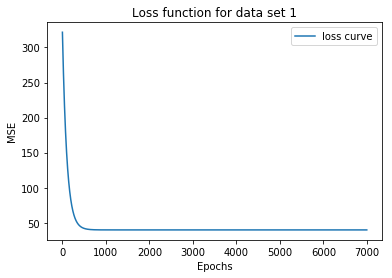

In [90]:
plt.plot(range(n_epochs), mse_list, label = 'loss curve')
plt.legend()
plt.title('Loss function for data set 1')
plt.xlabel('Epochs') 
plt.ylabel('MSE') 
plt.show() 

In [91]:
'''
Compute mean square error of final trained parameters on testing data
'''
# YOUR CODE HERE
predicted_y_test = [None] *  len(x_test)
#for i in range(len(x_test)):
predicted_y_test= (m * x_test) +c #filling predicted_y
mean_square_error(y_test, predicted_y_test)

mse :  35.37932001552299


35.37932001552299

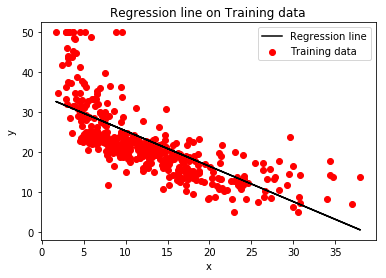

In [92]:
'''
Plot a regression line on the training and the testing data separately.
'''
# YOUR CODE HERE
plt.scatter(x_train,y_train, c = 'red', label = 'Training data')
# plotting the regression line 
plt.plot(x_train, predicted_y_train, c= 'black', label = 'Regression line')
plt.legend()
plt.title('Regression line on Training data')
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

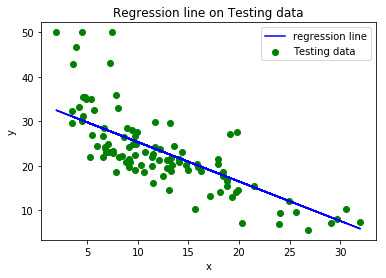

In [93]:
plt.scatter(x_test,y_test, c = 'green', label = 'Testing data')
# plotting the regression line 
plt.plot(x_test, predicted_y_test, c= 'blue', label = 'regression line') 
plt.legend()
plt.title('Regression line on Testing data')
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

### For dataset 2

In [36]:
(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset2.pkl", "rb" ) )

x_train.resize(len(x_train))
x_test.resize(len(x_test))


In [94]:
'''
Initialize parameters i.e. learning rates, initial values of line parameters and number of epochs.
'''
# YOUR CODE HERE
from random import randint
c = 0 #randint(0, 10)
m = 0
alpha = 0.01 #10**-5
n_epochs = 7000

In [95]:
'''
Predict output and update parameters using stochastic gradient descent.
Compute mean square error in each iteration using mean_square_error function and plot on the graph using matplotlib library
'''
# YOUR CODE HERE
n = float(len(x_train)) 
mse_list =[]
for i in range(n_epochs): 
    for j in range(len(x_train)):
        pred_y = m * x_train[j] + c
        m_der = (-2/n) * (x_train[j] * (y_train[j] - pred_y))  #derivative taken by hand and last equation written here.
        m = m - alpha * m_der 
        c_der = (-2/n) * (y_train[j] - pred_y)
        c = c - alpha * c_der
    print (m, c)
    
    predicted_y_train = [None] *  len(x_train)
    predicted_y_train = (m * x_train) +c #filling predicted_y
        
    mse_list.append(mean_square_error(y_train, predicted_y_train))
    #print(mse_list)

1.0843494757434917 0.22838110731693353
mse :  321.72734254945686
1.0886048883075143 0.3944712934717059
mse :  318.99621905697575
1.0791708660245594 0.5589751973874093
mse :  316.2850041651956
1.0696089239157287 0.7226686799040692
mse :  313.5994873770457
1.0600913025528733 0.88556545343527
mse :  310.9400405572881
1.0506199687685318 1.0476695192439982
mse :  308.3064187055579
1.0411947250685747 1.2089847364712698
mse :  305.69837117141174
1.0318153475173573 1.369514943918551
mse :  303.1156496341301
1.0224816129204914 1.529263961686675
mse :  300.558008182689
1.01319329916529 1.6882355912864322
mse :  298.02520329369105
1.0039501852198813 1.8464336157292736
mse :  295.51699380820185
0.9947520511279966 2.0038617996173547
mse :  293.0331409087926
0.9855986780037482 2.1605238892330982
mse :  290.5734080968057
0.9764898480264107 2.316423612628381
mse :  288.13756116984155
0.9674253444352441 2.4715646797132043
mse :  285.72536819946527
0.9584049515243341 2.6259507823440003
mse :  283.336599

-0.07736463887586284 20.353385924550953
mse :  86.56463437637817
-0.08130076032892881 20.42075354995509
mse :  86.11001758373357
-0.08521772739663554 20.487793343641346
mse :  85.65981656877723
-0.08911563329015486 20.554506900940428
mse :  85.21398844959703
-0.09299457076705792 20.620895809419487
mse :  84.77249076066673
-0.09685463213353109 20.68696164892019
mse :  84.33528144879911
-0.10069590924657161 20.752705991596205
mse :  83.90231886914445
-0.10451849351617003 20.81813040195059
mse :  83.47356178122561
-0.10832247590748886 20.883236436873037
mse :  83.04896934501147
-0.11210794694302709 20.94802564567697
mse :  82.62850111702855
-0.11587499670477086 21.012499570136352
mse :  82.21211704651117
-0.11962371483633673 21.07665974452229
mse :  81.7997774715891
-0.12335419054511612 21.140507695639897
mse :  81.39144311550885
-0.1270665126043857 21.204044942864208
mse :  80.98707508289777
-0.13076076935541897 21.267272998176495
mse :  80.58663485605928
-0.1344370487096008 21.330193366

mse :  52.54120396945173
-0.4655085012368276 26.996557542662593
mse :  52.417108002767435
-0.4675557945115421 27.031597438679
mse :  52.29421788562679
-0.469593125023472 27.06646681971531
mse :  52.172521905598934
-0.4716205412545073 27.101166515550222
mse :  52.0520084639918
-0.47363809145060703 27.13569735192444
mse :  51.93266607474852
-0.47564582362294944 27.170060150560357
mse :  51.81448336335307
-0.4776437855490762 27.20425572918158
mse :  51.6974490657475
-0.4796320247740308 27.23828490153251
mse :  51.58155202725922
-0.4816105886114888 27.27214847739757
mse :  51.46678120153906
-0.4835795241448777 27.305847262620503
mse :  51.35312564950948
-0.4855388782285085 27.339382059123622
mse :  51.24057453832271
-0.48748869748867746 27.372753664926716
mse :  51.12911714032977
-0.48942902832478874 27.405962874166285
mse :  51.018742832058244
-0.4913599169104504 27.439010477114287
mse :  50.909441093201146
-0.4932814091945792 27.47189726019697
mse :  50.80120150561532
-0.4951935509024842

-0.6747396755300898 30.577597289715303
mse :  42.96314030604069
-0.6757687851463252 30.59521073786547
mse :  42.93214084227698
-0.6767928867966221 30.612738473524946
mse :  42.901442855354816
-0.677812004851292 30.63018091379724
mse :  42.87104341579689
-0.6788261635620572 30.647538473756175
mse :  42.84093962257988
-0.6798353870626163 30.66481156645553
mse :  42.81112860285834
-0.6808396993692339 30.68200060293921
mse :  42.78160751169088
-0.6818391243812972 30.699105992250754
mse :  42.75237353176939
-0.6828336858818947 30.716128141443185
mse :  42.72342387315034
-0.683823407538377 30.733067455588664
mse :  42.69475577298938
-0.6848083129029262 30.749924337788208
mse :  42.666366495278055
-0.6857884254131084 30.76669918918119
mse :  42.638253330583055
-0.686763768392438 30.7833924089549
mse :  42.61041359578862
-0.6877343650509274 30.800004394354033
mse :  42.582844633840395
-0.6887002384856424 30.816535540690246
mse :  42.55554381349252
-0.6896614116812527 30.832986241351406
mse :  

mse :  40.30433303081637
-0.8004478565098038 32.72912176563823
mse :  40.29920923938822
-0.8008652312063148 32.736265229716544
mse :  40.29413540033399
-0.8012805748283599 32.74337393148743
mse :  40.28911102766783
-0.8016938972597751 32.75044804011513
mse :  40.28413564012695
-0.8021052083363037 32.75748772394056
mse :  40.27920876112605
-0.8025145178458146 32.764493150485414
mse :  40.27432991871184
-0.8029218355285566 32.771464486456274
mse :  40.269498645517906
-0.8033271710773746 32.778401897748424
mse :  40.26471447872022
-0.8037305341379473 32.78530554944983
mse :  40.25997695999317
-0.804131934309011 32.79217560584514
mse :  40.25528563546557
-0.8045313811425951 32.79901223041953
mse :  40.250640055677735
-0.8049288841442447 32.805815585862575
mse :  40.246039775538286
-0.8053244527732464 32.81258583407209
mse :  40.24148435428198
-0.8057180964428564 32.81932313615828
mse :  40.23697335542751
-0.8061098245205329 32.82602765244717
mse :  40.23250634673589
-0.8064996463281241 32.

-0.850572297382333 33.58701311796481
mse :  39.86834665997445
-0.8507457510342838 33.589981817175136
mse :  39.867480634248885
-0.8509183606070755 33.592936069776265
mse :  39.86662310182423
-0.8510901302082563 33.595875946069754
mse :  39.86577397982539
-0.8512610639253932 33.59880151601526
mse :  39.8649331861839
-0.8514311658261496 33.60171284923183
mse :  39.8641006396301
-0.8516004399584057 33.60461001499979
mse :  39.86327625968543
-0.8517688903503371 33.60749308226237
mse :  39.862459966654576
-0.8519365210105196 33.61036211962723
mse :  39.861651681617985
-0.8521033359280232 33.61321719536819
mse :  39.86085132642425
-0.852269339072504 33.6160583774269
mse :  39.86005882368285
-0.8524345343942997 33.61888573341424
mse :  39.859274096756444
-0.8525989258245242 33.62169933061214
mse :  39.85849706975374
-0.8527625172751598 33.62449923597509
mse :  39.85772766752222
-0.8529253126391618 33.627285516131955
mse :  39.85696581564088
-0.8530873157905313 33.63005823738712
mse :  39.8562

-0.8712579138363556 33.94105220876644
mse :  39.7954613971653
-0.8713307048757261 33.9422980441736
mse :  39.79531316002669
-0.8714031416913645 33.94353781695994
mse :  39.795166397830606
-0.8714752260070343 33.94477155662819
mse :  39.79502109608319
-0.8715469595381126 33.945999292537266
mse :  39.794877240431916
-0.8716183439916216 33.947221053903405
mse :  39.79473481666477
-0.8716893810662893 33.94843686980061
mse :  39.79459381070823
-0.8717600724525612 33.94964676916132
mse :  39.79445420862656
-0.8718304198326658 33.9508507807772
mse :  39.79431599661992
-0.8719004248806435 33.952048933299864
mse :  39.79417916102329
-0.8719700892623891 33.95324125524153
mse :  39.79404368830534
-0.8720394146356926 33.954427774975585
mse :  39.79390956506675
-0.8721084026502702 33.95560852073733
mse :  39.7937767780392
-0.872177054947814 33.956783520624704
mse :  39.79364531408391
-0.8722453731620274 33.95795280259889
mse :  39.79351516019049
-0.8723133589186577 33.95911639448501
mse :  39.79338

-0.8802084118561575 34.094242044234726
mse :  39.78292593312998
-0.8802376470016696 34.09474241048486
mse :  39.78290379389369
-0.8802667398799147 34.095240341797954
mse :  39.78288188395111
-0.8802956911832077 34.095735850023054
mse :  39.78286020100607
-0.8803245016004918 34.09622894695174
mse :  39.78283874278543
-0.8803531718173738 34.096719644318256
mse :  39.78281750703808
-0.880381702516108 34.097207953799455
mse :  39.782796491535215
-0.8804100943756229 34.09769388701546
mse :  39.78277569407014
-0.8804383480715628 34.09817745553008
mse :  39.78275511245777
-0.880466464276275 34.098658670850675
mse :  39.782734744534665
-0.8804944436588334 34.099137544428544
mse :  39.78271458815852
-0.8805222868850535 34.099614087659326
mse :  39.78269464120842
-0.8805499946175186 34.100088311883326
mse :  39.78267490158426
-0.8805775675155779 34.10056022838531
mse :  39.78265536720657
-0.8806050062353824 34.10102984839567
mse :  39.782636036016534
-0.8806323114298844 34.101497183089634
mse : 

-0.8837193945170086 34.15433332127406
mse :  39.781142805867006
-0.8837315441341194 34.15454126476972
mse :  39.78113970168274
-0.8837436346274262 34.154748196347875
mse :  39.781136633598344
-0.883755666284656 34.154954120933006
mse :  39.78113360123446
-0.8837676393921182 34.15515904342537
mse :  39.7811306042153
-0.8837795542347351 34.155362968701546
mse :  39.78112764216908
-0.8837914110960391 34.155565901614075
mse :  39.78112471472744
-0.8838032102581831 34.155767846992255
mse :  39.78112182152621
-0.8838149520019482 34.15596880964164
mse :  39.78111896220457
-0.8838266366067569 34.15616879434466
mse :  39.78111613640535
-0.8838382643506654 34.156367805860256
mse :  39.78111334377503
-0.8838498355103686 34.15656584892411
mse :  39.78111058396379
-0.8838613503612275 34.1567629282492
mse :  39.78110785662519
-0.8838728091772667 34.15695904852539
mse :  39.78110516141621
-0.8838842122311529 34.15715421441947
mse :  39.78110249799749
-0.8838955597942483 34.15734843057589
mse :  39.78

-0.8851632016020204 34.17904441213307
mse :  39.78092198766124
-0.8851683252069461 34.179132103811696
mse :  39.78092173583896
-0.8851734238788286 34.17921936875551
mse :  39.780921488975636
-0.8851784977389929 34.17930620904102
mse :  39.78092124701091
-0.8851835469081787 34.17939262673479
mse :  39.78092100988509
-0.8851885715065487 34.17947862389336
mse :  39.78092077753902
-0.8851935716536612 34.179564202563036
mse :  39.780920549914306
-0.8851985474685107 34.17964936478043
mse :  39.78092032695305
-0.8852034990695076 34.17973411257217
mse :  39.780920108598096
-0.8852084265744844 34.17981844795496
mse :  39.780919894792795
-0.8852133301006947 34.17990237293562
mse :  39.78091968548113
-0.8852182097648287 34.17998588951137
mse :  39.78091948060771
-0.8852230656830065 34.180068999669615
mse :  39.78091928011784
-0.885227897970786 34.180151705388134
mse :  39.780919083957166
-0.8852327067431555 34.180234008635
mse :  39.780918892072165
-0.8852374921145518 34.180315911368815
mse :  39

-0.8857973135187478 34.189897383663535
mse :  39.78091939242257
-0.885799351338807 34.18993226142328
mse :  39.78091947694523
-0.8858013792422029 34.18996696945705
mse :  39.780919561647224
-0.8858033972771976 34.19000150859086
mse :  39.78091964652191
-0.885805405491804 34.19003587964644
mse :  39.78091973156271
-0.8858074039338141 34.190070083441825
mse :  39.780919816763316
-0.8858093926507885 34.190104120790956
mse :  39.78091990211725
-0.8858113716900521 34.19013799250386
mse :  39.780919987618425
-0.8858133410986992 34.19017169938654
mse :  39.78092007326049
-0.885815300923595 34.1902052422411
mse :  39.78092015903744
-0.8858172512113766 34.19023862186575
mse :  39.7809202449432
-0.8858191920084553 34.19027183905485
mse :  39.78092033097193
-0.8858211233610115 34.19030489459876
mse :  39.78092041711767
-0.8858230453150074 34.19033778928413
mse :  39.780920503374766
-0.8858249579161797 34.19037052389381
mse :  39.78092058973749
-0.8858268612100447 34.19040309920673
mse :  39.78092

-0.8860386155260835 34.19402732310603
mse :  39.78093353667198
-0.8860394790958843 34.194042103302074
mse :  39.78093360227183
-0.886040338463291 34.194056811573205
mse :  39.78093366765851
-0.8860411936487449 34.19407144826925
mse :  39.780933732832054
-0.8860420446726007 34.1940860137386
mse :  39.78093379779244
-0.8860428915551135 34.1941005083279
mse :  39.78093386253974
-0.8860437343164317 34.194114932382
mse :  39.78093392707392
-0.8860445729766122 34.19412928624418
mse :  39.780933991395045
-0.886045407555613 34.19414357025601
mse :  39.78093405550326
-0.8860462380732942 34.194157784757486
mse :  39.78093411939856
-0.8860470645494211 34.19417193008676
mse :  39.780934183081015
-0.8860478870036566 34.19418600658048
mse :  39.780934246550736
-0.8860487054555755 34.194200014573575
mse :  39.780934309807726
-0.8860495199246549 34.1942139543995
mse :  39.78093437285223
-0.8860503304302778 34.194227826389984
mse :  39.78093443568431
-0.8860511369917315 34.19424163087505
mse :  39.7809

mse :  39.780940559311425
-0.8861246689365928 34.19550014705035
mse :  39.780940598734496
-0.8861251137438639 34.19550776002927
mse :  39.78094063799417
-0.8861255563865612 34.195515335960984
mse :  39.780940677090946
-0.8861259968752223 34.195522875025894
mse :  39.78094071602531
-0.8861264352203259 34.19553037740331
mse :  39.78094075479782
-0.8861268714323068 34.19553784327187
mse :  39.78094079340897
-0.8861273055215474 34.19554527280923
mse :  39.78094083185935
-0.8861277374983775 34.19555266619219
mse :  39.78094087014932
-0.8861281673730746 34.19556002359668
mse :  39.78094090827957
-0.8861285951558647 34.19556734519765
mse :  39.78094094625051
-0.8861290208569369 34.19557463116956
mse :  39.7809409840627
-0.8861294444864103 34.19558188168559
mse :  39.78094102171664
-0.8861298660543744 34.19558909691842
mse :  39.780941059212914
-0.8861302855708557 34.19559627703963
mse :  39.78094109655196
-0.8861307030458392 34.19560342222014
mse :  39.78094113373435
-0.8861311184892623 34.19

-0.886179719549018 34.1964423509636
mse :  39.78094567296058
-0.8861798964629632 34.196445378886516
mse :  39.78094568996728
-0.8861800725159928 34.19644839207471
mse :  39.780945706895764
-0.8861802477122932 34.19645139059971
mse :  39.78094572374616
-0.8861804220560364 34.196454374533076
mse :  39.78094574051901
-0.8861805955513712 34.19645734394573
mse :  39.780945757214575
-0.8861807682024211 34.196460298908164
mse :  39.78094577383306
-0.8861809400132944 34.19646323949083
mse :  39.78094579037498
-0.8861811109880832 34.19646616576373
mse :  39.780945806840634
-0.8861812811308596 34.19646907779657
mse :  39.780945823230326
-0.8861814504456659 34.19647197565848
mse :  39.78094583954433
-0.8861816189365361 34.19647485941853
mse :  39.78094585578297
-0.8861817866074794 34.19647772914534
mse :  39.7809458719467
-0.8861819534624799 34.19648058490713
mse :  39.78094588803581
-0.8861821195055142 34.19648342677191
mse :  39.78094590405053
-0.8861822847405317 34.1964862548073
mse :  39.7809

-0.8862012579057725 34.196810984901106
mse :  39.78094777640041
-0.8862013300074071 34.196812218937154
mse :  39.78094778355342
-0.8862014017581765 34.19681344696812
mse :  39.780947790672464
-0.8862014731597809 34.19681466902304
mse :  39.78094779775754
-0.8862015442139299 34.19681588513118
mse :  39.780947804808896
-0.8862016149223035 34.19681709532124
mse :  39.78094781182661
-0.8862016852865853 34.196818299622166
mse :  39.78094781881096
-0.8862017553084577 34.19681949806265
mse :  39.780947825762006
-0.8862018249895769 34.196820690671025
mse :  39.78094783267989
-0.8862018943316079 34.19682187747588
mse :  39.78094783956477
-0.8862019633361994 34.19682305850534
mse :  39.780947846416865
-0.8862020320049924 34.196824233787574
mse :  39.78094785323634
-0.8862021003396233 34.196825403350516
mse :  39.78094786002325
-0.8862021683417162 34.19682656722198
mse :  39.78094786677775
-0.8862022360128897 34.19682772542971
mse :  39.78094787350014
-0.8862023033547566 34.196828878001305
mse : 

-0.886209886811237 34.19695867060591
mse :  39.78094863774787
-0.8862099169219532 34.19695918595776
mse :  39.78094864077226
-0.8862099468861415 34.19695969880174
mse :  39.780948643782025
-0.8862099767045135 34.196960209150056
mse :  39.780948646777276
-0.8862100063777796 34.19696071701481
mse :  39.780948649758045
-0.8862100359066448 34.19696122240814
mse :  39.780948652724454
-0.8862100652918126 34.196961725342064
mse :  39.780948655676596
-0.8862100945339855 34.1969622258286
mse :  39.780948658614484
-0.8862101236338548 34.19696272387954
mse :  39.780948661538126
-0.8862101525921152 34.196963219506856
mse :  39.780948664447784
-0.8862101814094557 34.19696371272226
mse :  39.780948667343296
-0.8862102100865612 34.19696420353753
mse :  39.78094867022486
-0.886210238624114 34.19696469196434
mse :  39.78094867309258
-0.8862102670227945 34.1969651780143
mse :  39.78094867594639
-0.886210295283278 34.19696566169899
mse :  39.780948678786494
-0.886210323406237 34.1969661430299
mse :  39.7

-0.8862135526344832 34.19702141201522
mse :  39.780949006903185
-0.8862135649061628 34.19702162204783
mse :  39.780949008142194
-0.8862135771181261 34.19702183105838
mse :  39.780949009375156
-0.8862135892706625 34.1970220390519
mse :  39.78094901060229
-0.886213601364064 34.197022246033214
mse :  39.78094901182331
-0.8862136133986135 34.19702245200731
mse :  39.78094901303842
-0.8862136253745969 34.19702265697903
mse :  39.78094901424773
-0.8862136372923016 34.19702286095329
mse :  39.780949015451135
-0.8862136491520177 34.19702306393508
mse :  39.7809490166487
-0.8862136609540194 34.19702326592904
mse :  39.78094901784045
-0.886213672698586 34.19702346694
mse :  39.7809490190264
-0.8862136843860016 34.19702366697282
mse :  39.78094902020664
-0.8862136960165382 34.197023866032126
mse :  39.78094902138112
-0.8862137075904786 34.19702406412278
mse :  39.78094902254993
-0.8862137191080961 34.19702426124946
mse :  39.78094902371306
-0.8862137305696649 34.197024457416845
mse :  39.78094902

-0.8862147691369784 34.197042232735654
mse :  39.78094912983272
-0.8862147754887807 34.197042341448224
mse :  39.78094913047516
-0.8862147818096762 34.197042449631816
mse :  39.78094913111443
-0.8862147880998097 34.19704255728889
mse :  39.78094913175064
-0.8862147943593327 34.19704266442206
mse :  39.780949132383746
-0.886214800588397 34.19704277103394
mse :  39.780949133013756
-0.8862148067871485 34.19704287712701
mse :  39.78094913364075
-0.8862148129557322 34.19704298270373
mse :  39.78094913426465
-0.8862148190942994 34.1970430877667
mse :  39.78094913488552
-0.8862148252029957 34.19704319231848
mse :  39.78094913550342
-0.8862148312819651 34.19704329636142
mse :  39.78094913611828
-0.8862148373313494 34.197043399898014
mse :  39.78094913673016
-0.886214843351296 34.1970435029308
mse :  39.78094913733908
-0.8862148493419475 34.19704360546216
mse :  39.780949137945015
-0.8862148553034473 34.19704370749462
mse :  39.780949138548046
-0.886214861235939 34.19704380903062
mse :  39.7809

mse :  39.78094919320972
-0.8862153987968093 34.19705300950873
mse :  39.78094919354417
-0.8862154020844943 34.19705306577821
mse :  39.78094919387699
-0.88621540535618 34.19705312177387
mse :  39.78094919420814
-0.8862154086119476 34.1970531774971
mse :  39.780949194537776
-0.8862154118518712 34.1970532329491
mse :  39.78094919486571
-0.8862154150760214 34.19705328813118
mse :  39.780949195192115
-0.8862154182844834 34.19705334304473
mse :  39.780949195516875
-0.8862154214773293 34.19705339769103
mse :  39.78094919584008
-0.8862154246546423 34.19705345207147
mse :  39.78094919616175
-0.8862154278164923 34.197053506187295
mse :  39.780949196481856
-0.8862154309629573 34.197053560039755
mse :  39.780949196800364
-0.886215434094109 34.197053613630125
mse :  39.78094919711732
-0.8862154372100247 34.197053666959775
mse :  39.780949197432825
-0.8862154403107786 34.19705372002986
mse :  39.780949197746686
-0.8862154433964413 34.197053772841684
mse :  39.78094919805905
-0.8862154464670892 34.

-0.8862158056899004 34.19705997357771
mse :  39.780949234745385
-0.8862158069975188 34.19705999595789
mse :  39.78094923487785
-0.8862158082987713 34.197060018229145
mse :  39.78094923500967
-0.88621580959369 34.19706004039196
mse :  39.78094923514074
-0.8862158108823109 34.19706006244705
mse :  39.78094923527134
-0.8862158121646624 34.19706008439476
mse :  39.780949235401216
-0.8862158134407706 34.19706010623563
mse :  39.780949235530464
-0.8862158147106716 34.197060127970296
mse :  39.780949235659094
-0.8862158159743929 34.19706014959917
mse :  39.780949235787105
-0.8862158172319625 34.19706017112276
mse :  39.78094923591445
-0.8862158184834118 34.197060192541606
mse :  39.78094923604122
-0.8862158197287676 34.19706021385615
mse :  39.780949236167345
-0.8862158209680653 34.19706023506703
mse :  39.78094923629289
-0.8862158222013354 34.19706025617472
mse :  39.7809492364178
-0.886215823428602 34.19706027717967
mse :  39.78094923654209
-0.8862158246498945 34.19706029808236
mse :  39.78

mse :  39.780949249309806
-0.8862159500763194 34.19706244478453
mse :  39.78094924937141
-0.8862159506813075 34.19706245513905
mse :  39.78094924943269
-0.8862159512833521 34.19706246544317
mse :  39.78094924949366
-0.8862159518824658 34.19706247569716
mse :  39.78094924955437
-0.8862159524786616 34.19706248590115
mse :  39.780949249614764
-0.8862159530719589 34.19706249605559
mse :  39.78094924967489
-0.8862159536623678 34.197062506160584
mse :  39.780949249734725
-0.8862159542499048 34.197062516216405
mse :  39.780949249794205
-0.8862159548345823 34.19706252622329
mse :  39.78094924985344
-0.8862159554164185 34.19706253618154
mse :  39.78094924991237
-0.8862159559954198 34.1970625460913
mse :  39.780949249971044
-0.8862159565716032 34.19706255595282
mse :  39.78094925002944
-0.8862159571449834 34.19706256576637
mse :  39.780949250087545
-0.8862159577155753 34.19706257553217
mse :  39.780949250145326
-0.886215958283385 34.197062585250336
mse :  39.780949250202845
-0.8862159588484325 3

mse :  39.78094925695722
-0.8862160251918603 34.197063730404324
mse :  39.78094925698163
-0.8862160254313126 34.19706373450261
mse :  39.780949257005915
-0.8862160256696001 34.19706373858094
mse :  39.780949257029995
-0.88621602590673 34.1970637426395
mse :  39.780949257054026
-0.8862160261427048 34.19706374667825
mse :  39.780949257077914
-0.8862160263775285 34.1970637506973
mse :  39.78094925710175
-0.886216026611208 34.197063754696785
mse :  39.78094925712543
-0.8862160268437507 34.19706375867678
mse :  39.78094925714893
-0.8862160270751638 34.197063762637505
mse :  39.7809492571724
-0.8862160273054525 34.19706376657894
mse :  39.78094925719576
-0.8862160275346194 34.19706377050115
mse :  39.78094925721893
-0.8862160277626663 34.19706377440425
mse :  39.78094925724206
-0.886216027989609 34.19706377828843
mse :  39.78094925726508
-0.8862160282154483 34.19706378215373
mse :  39.78094925728795
-0.886216028440185 34.197063786000136
mse :  39.78094925731069
-0.8862160286638295 34.1970637

-0.886216048679248 34.19706413239636
mse :  39.780949259361314
-0.886216048804399 34.19706413453833
mse :  39.780949259374
-0.8862160489289445 34.19706413666999
mse :  39.78094925938666
-0.886216049052886 34.19706413879128
mse :  39.78094925939923
-0.8862160491762237 34.19706414090224
mse :  39.78094925941174
-0.8862160492989605 34.19706414300289
mse :  39.780949259424155
-0.8862160494210984 34.197064145093314
mse :  39.78094925943651
-0.8862160495426484 34.197064147173684
mse :  39.78094925944882
-0.886216049663601 34.197064149243786
mse :  39.78094925946105
-0.8862160497839666 34.19706415130386
mse :  39.78094925947325
-0.8862160499037449 34.19706415335391
mse :  39.78094925948543
-0.8862160500229413 34.197064155393996
mse :  39.78094925949752
-0.8862160501415607 34.197064157424194
mse :  39.78094925950952
-0.8862160502595958 34.19706415944437
mse :  39.780949259521456
-0.8862160503770607 34.19706416145482
mse :  39.7809492595334
-0.8862160504939515 34.1970641634554
mse :  39.7809492

-0.8862160637616818 34.19706439053571
mse :  39.78094926088954
-0.8862160638134432 34.197064391421605
mse :  39.78094926089479
-0.8862160638649523 34.19706439230319
mse :  39.78094926090002
-0.8862160639162066 34.1970643931804
mse :  39.780949260905196
-0.8862160639672105 34.19706439405337
mse :  39.7809492609104
-0.8862160640179707 34.19706439492214
mse :  39.78094926091551
-0.8862160640684833 34.197064395786676
mse :  39.78094926092059
-0.886216064118752 34.19706439664705
mse :  39.78094926092574
-0.8862160641687753 34.19706439750321
mse :  39.78094926093083
-0.8862160642185536 34.19706439835514
mse :  39.78094926093583
-0.8862160642680901 34.197064399202986
mse :  39.78094926094081
-0.8862160643173891 34.19706440004675
mse :  39.78094926094584
-0.8862160643664426 34.197064400886326
mse :  39.78094926095084
-0.8862160644152579 34.197064401721796
mse :  39.78094926095577
-0.8862160644638372 34.197064402553266
mse :  39.78094926096071
-0.8862160645121804 34.197064403380644
mse :  39.78

-0.8862160689460706 34.197064479267695
mse :  39.78094926141485
-0.8862160689726009 34.19706447972179
mse :  39.78094926141757
-0.8862160689990036 34.19706448017368
mse :  39.780949261420226
-0.8862160690252762 34.19706448062332
mse :  39.78094926142287
-0.8862160690514198 34.19706448107077
mse :  39.78094926142551
-0.8862160690774362 34.197064481516065
mse :  39.780949261428205
-0.8862160691033247 34.197064481959124
mse :  39.78094926143074
-0.8862160691290896 34.19706448240013
mse :  39.780949261433406
-0.8862160691547311 34.197064482838975
mse :  39.78094926143596
-0.8862160691802459 34.19706448327567
mse :  39.78094926143861
-0.8862160692056386 34.197064483710285
mse :  39.780949261441165
-0.886216069230909 34.197064484142786
mse :  39.78094926144373
-0.8862160692560537 34.19706448457314
mse :  39.78094926144624
-0.8862160692810753 34.19706448500137
mse :  39.78094926144872
-0.8862160693059751 34.19706448542756
mse :  39.78094926145134
-0.8862160693307548 34.19706448585166
mse :  3

-0.8862160718755027 34.197064529405594
mse :  39.7809492617117
-0.886216071887775 34.19706452961565
mse :  39.7809492617129
-0.8862160718999883 34.19706452982469
mse :  39.78094926171418
-0.8862160719121422 34.19706453003271
mse :  39.780949261715406
-0.8862160719242363 34.1970645302397
mse :  39.78094926171663
-0.8862160719362759 34.19706453044577
mse :  39.78094926171785
-0.8862160719482561 34.19706453065081
mse :  39.78094926171908
-0.8862160719601773 34.19706453085482
mse :  39.780949261720224
-0.8862160719720383 34.19706453105781
mse :  39.7809492617214
-0.8862160719838421 34.19706453125986
mse :  39.78094926172264
-0.8862160719955906 34.19706453146096
mse :  39.7809492617239
-0.8862160720072824 34.197064531661056
mse :  39.780949261725056
-0.8862160720189163 34.197064531860164
mse :  39.78094926172619
-0.8862160720304931 34.19706453205829
mse :  39.78094926172737
-0.886216072042011 34.19706453225544
mse :  39.780949261728544
-0.8862160720534724 34.19706453245159
mse :  39.7809492

mse :  39.780949261831054
-0.886216073060043 34.19706454967928
mse :  39.78094926183168
-0.8862160730665517 34.19706454979068
mse :  39.78094926183236
-0.8862160730730304 34.19706454990158
mse :  39.780949261833044
-0.8862160730794756 34.19706455001187
mse :  39.78094926183366
-0.8862160730858932 34.19706455012173
mse :  39.78094926183434
-0.8862160730922792 34.19706455023104
mse :  39.78094926183501
-0.8862160730986348 34.19706455033979
mse :  39.780949261835566
-0.8862160731049586 34.19706455044804
mse :  39.780949261836284
-0.8862160731112511 34.19706455055572
mse :  39.78094926183688
-0.8862160731175124 34.19706455066292
mse :  39.78094926183753
-0.8862160731237453 34.19706455076955
mse :  39.78094926183814
-0.8862160731299457 34.197064550875695
mse :  39.780949261838785
-0.8862160731361164 34.19706455098131
mse :  39.780949261839424
-0.886216073142258 34.19706455108639
mse :  39.78094926183998
-0.8862160731483664 34.197064551190955
mse :  39.78094926184067
-0.886216073154443 34.19

-0.8862160738026744 34.19706456238961
mse :  39.78094926190697
-0.8862160738055713 34.19706456243916
mse :  39.78094926190721
-0.8862160738084516 34.19706456248848
mse :  39.7809492619076
-0.8862160738113176 34.19706456253753
mse :  39.7809492619078
-0.8862160738141716 34.197064562586355
mse :  39.78094926190809
-0.8862160738170127 34.19706456263501
mse :  39.78094926190842
-0.8862160738198436 34.19706456268345
mse :  39.780949261908695
-0.8862160738226555 34.197064562731576
mse :  39.780949261908965
-0.8862160738254509 34.1970645627794
mse :  39.780949261909235
-0.8862160738282358 34.19706456282709
mse :  39.78094926190954
-0.8862160738310095 34.19706456287458
mse :  39.78094926190982
-0.8862160738337695 34.19706456292179
mse :  39.780949261910095
-0.8862160738365163 34.1970645629688
mse :  39.780949261910365
-0.8862160738392505 34.19706456301557
mse :  39.78094926191066
-0.8862160738419663 34.197064563062085
mse :  39.780949261910905
-0.8862160738446686 34.197064563108334
mse :  39.7

mse :  39.78094926194736
-0.886216074202264 34.197064569228665
mse :  39.78094926194745
-0.8862160742032185 34.197064569245015
mse :  39.78094926194755
-0.8862160742041707 34.19706456926129
mse :  39.780949261947605
-0.8862160742051157 34.19706456927746
mse :  39.7809492619477
-0.886216074206055 34.19706456929352
mse :  39.78094926194778
-0.8862160742069883 34.197064569309504
mse :  39.78094926194788
-0.8862160742079177 34.19706456932542
mse :  39.78094926194806
-0.8862160742088417 34.19706456934124
mse :  39.78094926194811
-0.8862160742097619 34.19706456935699
mse :  39.78094926194819
-0.8862160742106773 34.197064569372664
mse :  39.780949261948294
-0.8862160742115892 34.197064569388274
mse :  39.78094926194839
-0.8862160742124973 34.197064569403814
mse :  39.78094926194846
-0.8862160742134007 34.19706456941928
mse :  39.78094926194861
-0.8862160742143029 34.197064569434744
mse :  39.78094926194866
-0.8862160742152021 34.19706456945011
mse :  39.78094926194877
-0.8862160742160969 34.1

-0.8862160742951949 34.19706457081922
mse :  39.7809492619569
-0.8862160742956963 34.19706457082779
mse :  39.780949261956934
-0.8862160742961939 34.197064570836304
mse :  39.780949261956955
-0.8862160742966895 34.19706457084477
mse :  39.78094926195702
-0.8862160742971832 34.19706457085323
mse :  39.78094926195706
-0.8862160742976737 34.19706457086162
mse :  39.78094926195712
-0.8862160742981618 34.19706457086998
mse :  39.780949261957154
-0.88621607429865 34.19706457087834
mse :  39.78094926195722
-0.8862160742991343 34.19706457088663
mse :  39.780949261957254
-0.8862160742996166 34.197064570894895
mse :  39.78094926195731
-0.886216074300096 34.1970645709031
mse :  39.7809492619574
-0.8862160743005723 34.19706457091124
mse :  39.780949261957424
-0.8862160743010458 34.197064570919345
mse :  39.780949261957474
-0.8862160743015177 34.19706457092744
mse :  39.780949261957524
-0.8862160743019881 34.19706457093547
mse :  39.78094926195756
-0.8862160743024549 34.19706457094345
mse :  39.780

mse :  39.780949261961695
-0.886216074343446 34.19706457164501
mse :  39.780949261961716
-0.8862160743437084 34.197064571649506
mse :  39.780949261961744
-0.8862160743439703 34.19706457165399
mse :  39.78094926196178
-0.8862160743442319 34.19706457165847
mse :  39.78094926196184
-0.8862160743444929 34.19706457166295
mse :  39.78094926196185
-0.8862160743447538 34.19706457166742
mse :  39.780949261961894
-0.8862160743450131 34.19706457167186
mse :  39.78094926196193
-0.8862160743452705 34.197064571676265
mse :  39.780949261961965
-0.8862160743455276 34.19706457168065
mse :  39.78094926196197
-0.8862160743457824 34.19706457168502
mse :  39.78094926196197
-0.8862160743460367 34.197064571689374
mse :  39.780949261962
-0.8862160743462904 34.197064571693716
mse :  39.780949261962036
-0.8862160743465433 34.19706457169804
mse :  39.78094926196207
-0.8862160743467955 34.19706457170236
mse :  39.7809492619621
-0.8862160743470462 34.19706457170666
mse :  39.78094926196216
-0.8862160743472968 34.1

-0.8862160743734196 34.19706457215803
mse :  39.78094926196475
-0.8862160743735377 34.19706457216005
mse :  39.78094926196479
-0.8862160743736556 34.19706457216206
mse :  39.780949261964764
-0.8862160743737724 34.19706457216406
mse :  39.780949261964835
-0.8862160743738877 34.197064572166035
mse :  39.78094926196483
-0.8862160743740028 34.197064572168
mse :  39.780949261964835
-0.8862160743741176 34.19706457216997
mse :  39.780949261964864
-0.8862160743742326 34.19706457217194
mse :  39.780949261964864
-0.8862160743743471 34.1970645721739
mse :  39.78094926196486
-0.8862160743744608 34.19706457217585
mse :  39.78094926196489
-0.8862160743745728 34.197064572177766
mse :  39.780949261964864
-0.8862160743746852 34.197064572179684
mse :  39.78094926196491
-0.8862160743747962 34.19706457218159
mse :  39.78094926196492
-0.8862160743749067 34.19706457218347
mse :  39.78094926196489
-0.8862160743750166 34.197064572185354
mse :  39.78094926196489
-0.8862160743751262 34.19706457218723
mse :  39.

-0.886216074385054 34.19706457235714
mse :  39.78094926196598
-0.8862160743851162 34.19706457235821
mse :  39.78094926196593
-0.8862160743851787 34.19706457235928
mse :  39.78094926196599
-0.8862160743852411 34.19706457236035
mse :  39.78094926196596
-0.8862160743853033 34.197064572361406
mse :  39.78094926196601
-0.8862160743853639 34.19706457236245
mse :  39.780949261965986
-0.8862160743854247 34.19706457236349
mse :  39.780949261965965
-0.8862160743854849 34.19706457236451
mse :  39.78094926196599
-0.8862160743855446 34.197064572365534
mse :  39.780949261966
-0.8862160743856033 34.19706457236654
mse :  39.78094926196604
-0.8862160743856621 34.19706457236755
mse :  39.78094926196599
-0.8862160743857215 34.19706457236856
mse :  39.780949261965986
-0.8862160743857799 34.19706457236957
mse :  39.78094926196602
-0.8862160743858389 34.19706457237058
mse :  39.78094926196606
-0.8862160743858973 34.19706457237158
mse :  39.78094926196605
-0.8862160743859555 34.197064572372575
mse :  39.7809

-0.886216074392769 34.19706457248921
mse :  39.78094926196673
-0.8862160743927969 34.19706457248969
mse :  39.78094926196673
-0.8862160743928241 34.197064572490156
mse :  39.78094926196675
-0.8862160743928515 34.19706457249062
mse :  39.78094926196673
-0.8862160743928781 34.19706457249107
mse :  39.78094926196677
-0.8862160743929047 34.197064572491534
mse :  39.780949261966754
-0.8862160743929315 34.197064572491996
mse :  39.780949261966754
-0.8862160743929587 34.19706457249246
mse :  39.780949261966754
-0.8862160743929856 34.19706457249291
mse :  39.78094926196673
-0.8862160743930122 34.19706457249337
mse :  39.78094926196676
-0.8862160743930383 34.197064572493815
mse :  39.78094926196677
-0.8862160743930643 34.19706457249427
mse :  39.7809492619668
-0.8862160743930911 34.197064572494725
mse :  39.78094926196676
-0.8862160743931179 34.19706457249518
mse :  39.78094926196674
-0.8862160743931442 34.197064572495634
mse :  39.78094926196679
-0.8862160743931702 34.19706457249608
mse :  39.

-0.8862160743957826 34.197064572540775
mse :  39.78094926196703
-0.8862160743957942 34.197064572540974
mse :  39.78094926196706
-0.8862160743958054 34.19706457254117
mse :  39.78094926196709
-0.8862160743958171 34.19706457254137
mse :  39.780949261967066
-0.8862160743958288 34.19706457254157
mse :  39.78094926196707
-0.8862160743958405 34.19706457254177
mse :  39.78094926196705
-0.8862160743958519 34.19706457254197
mse :  39.78094926196708
-0.8862160743958638 34.19706457254217
mse :  39.78094926196704
-0.8862160743958752 34.19706457254237
mse :  39.780949261967024
-0.8862160743958869 34.197064572542565
mse :  39.78094926196709
-0.8862160743958988 34.197064572542764
mse :  39.780949261967066
-0.8862160743959103 34.19706457254296
mse :  39.780949261967066
-0.8862160743959221 34.19706457254316
mse :  39.780949261967066
-0.8862160743959332 34.19706457254336
mse :  39.78094926196707
-0.8862160743959445 34.19706457254355
mse :  39.780949261967066
-0.8862160743959561 34.197064572543745
mse : 

-0.886216074396923 34.19706457256031
mse :  39.78094926196716
-0.8862160743969298 34.19706457256043
mse :  39.78094926196719
-0.8862160743969371 34.19706457256055
mse :  39.780949261967145
-0.8862160743969436 34.19706457256067
mse :  39.78094926196718
-0.8862160743969512 34.19706457256079
mse :  39.78094926196717
-0.8862160743969583 34.19706457256091
mse :  39.78094926196714
-0.8862160743969654 34.19706457256103
mse :  39.78094926196719
-0.8862160743969726 34.19706457256115
mse :  39.78094926196717
-0.8862160743969792 34.197064572561274
mse :  39.78094926196715
-0.8862160743969864 34.197064572561395
mse :  39.78094926196716
-0.8862160743969937 34.197064572561516
mse :  39.780949261967166
-0.8862160743970009 34.19706457256164
mse :  39.78094926196716
-0.8862160743970078 34.19706457256176
mse :  39.78094926196719
-0.8862160743970147 34.19706457256188
mse :  39.7809492619672
-0.8862160743970221 34.197064572562
mse :  39.78094926196719
-0.8862160743970287 34.19706457256212
mse :  39.780949

-0.8862160743978158 34.197064572575584
mse :  39.78094926196728
-0.8862160743978195 34.19706457257564
mse :  39.780949261967244
-0.8862160743978227 34.1970645725757
mse :  39.78094926196725
-0.8862160743978257 34.197064572575755
mse :  39.78094926196724
-0.8862160743978288 34.19706457257581
mse :  39.78094926196727
-0.8862160743978321 34.19706457257587
mse :  39.78094926196726
-0.8862160743978352 34.19706457257592
mse :  39.78094926196726
-0.8862160743978381 34.19706457257597
mse :  39.780949261967244
-0.886216074397841 34.19706457257602
mse :  39.78094926196727
-0.8862160743978437 34.19706457257606
mse :  39.78094926196726
-0.8862160743978458 34.197064572576096
mse :  39.78094926196721
-0.8862160743978478 34.19706457257613
mse :  39.780949261967244
-0.88621607439785 34.19706457257617
mse :  39.78094926196726
-0.8862160743978519 34.1970645725762
mse :  39.78094926196726
-0.886216074397854 34.19706457257624
mse :  39.78094926196726
-0.8862160743978563 34.197064572576274
mse :  39.780949

-0.8862160743981254 34.19706457258088
mse :  39.78094926196725
-0.8862160743981272 34.197064572580906
mse :  39.78094926196726
-0.8862160743981288 34.197064572580935
mse :  39.780949261967294
-0.8862160743981304 34.19706457258096
mse :  39.78094926196727
-0.8862160743981321 34.19706457258099
mse :  39.78094926196729
-0.8862160743981337 34.19706457258102
mse :  39.7809492619673
-0.8862160743981353 34.19706457258105
mse :  39.78094926196729
-0.8862160743981368 34.19706457258108
mse :  39.780949261967294
-0.8862160743981383 34.197064572581105
mse :  39.780949261967315
-0.8862160743981401 34.197064572581134
mse :  39.780949261967315
-0.8862160743981417 34.19706457258116
mse :  39.78094926196729
-0.8862160743981433 34.19706457258119
mse :  39.78094926196731
-0.8862160743981448 34.19706457258122
mse :  39.78094926196731
-0.8862160743981464 34.19706457258125
mse :  39.780949261967294
-0.8862160743981482 34.197064572581276
mse :  39.78094926196731
-0.8862160743981498 34.197064572581304
mse :  

-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
m

-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
m

mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.886216074398

-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
m

-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
mse :  39.78094926196729
-0.8862160743982171 34.197064572582455
m

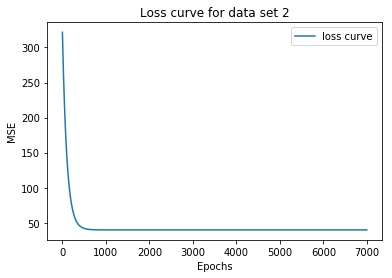

In [96]:
plt.plot(range(n_epochs), mse_list, label = 'loss curve')
plt.legend()
plt.title('Loss curve for data set 2')
plt.xlabel('Epochs') 
plt.ylabel('MSE') 
plt.show() 

In [97]:
'''
Compute mean square error of final trained parameters on testing data
'''
# YOUR CODE HERE
predicted_y_test = [None] *  len(x_test)
#for i in range(len(x_test)):
predicted_y_test= (m * x_test) +c #filling predicted_y
mean_square_error(y_test, predicted_y_test)

mse :  35.37932001552299


35.37932001552299

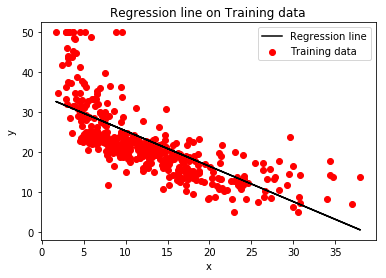

In [98]:
'''
Plot a regression line on the training and the testing data separately.
'''
# YOUR CODE HERE
plt.scatter(x_train,y_train, c = 'red', label = 'Training data')
# plotting the regression line 
plt.plot(x_train, predicted_y_train, c= 'black', label = 'Regression line')
plt.legend()
plt.title('Regression line on Training data')
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

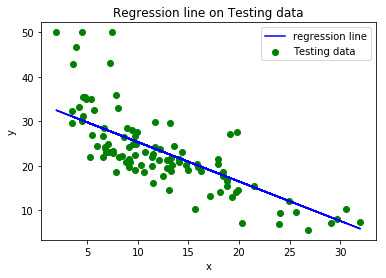

In [99]:
plt.scatter(x_test,y_test, c = 'green', label = 'Testing data')
# plotting the regression line 
plt.plot(x_test, predicted_y_test, c= 'blue', label = 'regression line') 
plt.legend()
plt.title('Regression line on Testing data')
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

**End of Notebook**